### **Section 1 - Initialization**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from IPython.display import display 

### **Section 2 - Load Data**

In [2]:
data_files_games = pd.read_csv('datasets/games.csv')
display(data_files_games)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
print(data_files_games.shape)

data_files_games.info()

(16715, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### **Section 2.1 Preliminary Data Cleaning**<br>
**Quantifying missing values in each column to identify data quality issues after initial inspection.**

In [4]:
data_files_games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

**Reviewing and Handling Missing Values in `Name` and `Genre` Columns Further 
  - **While seemingly nominal, these two rows affect counting functions and summary statistics. The goal is to evaluate their impact on the overall dataset and determine whether retaining or excluding them will lead to a more accurate analysis.**

In [5]:
data_files_games[data_files_games['Name'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**Following review of `Name` and `Genre` column:**<br>
- Missing values were replaced with 'Unknown' rather than deleting the rows since the `Name` and `Genre` columns are essential for proper categorization. 
- This approach maintains data integrity while preserving all records for a more complete analysis.<br>

**Additionally, reviewing rows 659 and 14244 revealed that while one row contributes meaningfully to overall sales analysis, the other is only relevant for JP_sales**
- **Filtering GEN platform games should help assess the scale of JP_sales more closely.**

In [6]:
gen_games = (
    data_files_games[data_files_games['Platform'] == 'GEN']
    .set_index(['Platform', 'Year_of_Release'])
    .sort_values(by=['Year_of_Release', 'Name'])
)

display(gen_games)

Name  \
Platform Year_of_Release                                                      
GEN      1990.0                                             Streets of Rage   
         1991.0                                          Sonic the Hedgehog   
         1992.0                                            Ecco the Dolphin   
         1992.0                                              Gunstar Heroes   
         1992.0                                               Mortal Kombat   
         1992.0                                                     NBA Jam   
         1992.0                                        Sonic the Hedgehog 2   
         1992.0                Street Fighter II': Special Champion Edition   
         1993.0                                                Beyond Oasis   
         1993.0                                             Dynamite Headdy   
         1993.0                                     Ecco: The Tides of Time   
         1993.0                                            Shining Force II   
         1993.0           Street Fighter II': Special Champion Edition (...   
         1993.0                                           Streets of Rage 3   
         1993.0                                     Super Street Fighter II   
         1993.0                                                         NaN   
         1993.0                                                         NaN   
         1994.0                                      Castlevania Bloodlines   
         1994.0                                      Disney's The Lion King   
         1994.0                         Dragon Slayer: The Legend of Heroes   
         1994.0                                      J-League Pro Striker 2   
         1994.0              Lunar 2: Eternal Blue(sales, but wrong system)   
         1994.0                                             Mortal Kombat 3   
         1994.0                                  NBA Jam Tournament Edition   
         1994.0                                     Puzzle & Action: Tant-R   
         1994.0                                            Sonic & Knuckles   
         1994.0                                        Sonic the Hedgehog 3   
         1994.0                                               Virtua Racing   
         1994.0                            Yuu Yuu Hakusho: Makyo Toitsusen   

                                 Genre  NA_sales  EU_sales  JP_sales  \
Platform Year_of_Release                                               
GEN      1990.0                 Action      1.86      0.55      0.11   
         1991.0               Platform      3.03      0.91      0.26   
         1992.0              Adventure      0.00      0.00      0.12   
         1992.0                Shooter      0.00      0.00      0.13   
         1992.0               Fighting      1.95      0.63      0.00   
         1992.0                 Sports      1.75      0.25      0.00   
         1992.0               Platform      4.47      1.20      0.16   
         1992.0               Fighting      1.00      0.30      0.31   
         1993.0           Role-Playing      0.00      0.00      0.05   
         1993.0               Platform      0.00      0.00      0.05   
         1993.0              Adventure      0.00      0.00      0.07   
         1993.0               Strategy      0.00      0.00      0.19   
         1993.0                 Action      0.00      0.00      0.07   
         1993.0                 Action      0.00      0.00      0.07   
         1993.0               Fighting      0.00      0.00      0.15   
         1993.0                    NaN      1.78      0.53      0.00   
         1993.0                    NaN      0.00      0.00      0.03   
         1994.0               Platform      0.00      0.00      0.04   
         1994.0               Platform      0.97      0.37      0.03   
         1994.0           Role-Playing      0.00      0.00      0.08   
         1994.0                 Sport

- The initial review was not as helpful as expected due to many cells with 0 values
- Assessing snapshot of values =>1 only to better gauge the data

In [7]:
display(data_files_games[data_files_games['JP_sales'] > 0])

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN


### **Section 2.2 Missing Values Handling Before Data Cleaning**<br>

- This dataset contains 22,318 missing values. While the exact cause is unknown, possible explanations include data deletion during processing or incomplete information collection during initial entry.
- Rows 669 and 14244 will be retained, with the two missing `Name` and `Genre` values replaced with 'Unknown'.
- Row 14244, which only contains data for `Year_of_Release`, `GEN`, and `JP_sales` columns, offers potentially valuable insights for Japan-specific analysis. 
- The missing 8,578 values in `critic_score` and 6,701 in `user_score` will be filled with their respective column medians during the cleaning process.<br>
- The 6,766 missing values in the `Rating` column will be replaced with 'Unknown'.
- The 269 missing values in `Year_of_Release` will be replaced with 0s.

### **Key Improvements**
- Enhanced Clarity – 'Unknown' clearly conveys missing data in all outputs, improving reviewer understanding.
- Reliable Aggregation – Enables accurate summing, counting, and averaging without missing values skewing results.
- Chronological Analysis  – Replacing missing 'year_of_release' values with 0s allows for chronological sorting while making these entries easily identifiable in time-based analyses.

In [8]:
data_files_games[['Name', 'Genre', 'Rating']] = data_files_games[['Name', 'Genre', 'Rating']].fillna('Unknown')

### **Section 3 - Data Cleaning and Standardization Recommendations**

### **The Games dataset consists of 16,715 rows and 11 columns:** 
- Numerical `float64`<br>
`Year_of_Release`(e.g.,2006.0)<br>
`NA_sales`, `EU_sales`, `JP_sales`, `Other_sales` (e.g., 0.00 - 2.43)<br>
`Critic_Score`(e.g., 58.0 - 89.0)<br>
<br>
- Categorical `object`<br>
`Name`, `Platform`, `Genre`, `User_Score`, `Rating`

### **Potential Data Type Issues & Fixes**
| Column | Issue | Suggested Fix |
|---------|--------|--------------|
| **Column Formatting** | Inconsistent casing, extra spaces, or special characters in column names | Convert to lowercase, strip spaces, and replace spaces with underscores, where necessary (e.g., `Year_of_Release` → `year_of_release`) |
| **`Year_of_Release`** | Stored as `float64`, but all values end in `.0` | Convert to `int64` |
| **`NA_sales`, `EU_sales`, `JP_sales`, `Other_sales`, `Critic_Score`** | Stored as `float64` with unnecessary decimals | Convert to `int64` |
| **`User_Score`** | Stored as `object`, containing both integers and floats | Convert to `float64`, then `int64` if no decimals remain |
| **`Genre` and `Rating`** | Stored as `object` | Convert to `category` for memory efficiency |



### **Key Improvements**
- Lowercase Formatting – Ensures consistency, improves readability, and facilitates automation
- Data Integrity – Ensures numbers are accurately represented without unnecessary decimals
- Memory Optimization – Converting `Genre` and `Rating` to `category`to reduces memory storage
- Enhance Analysis – Numeric columns in the correct format enable more precise calculations

**Standardize column names, stipe spaces and add underscores**

In [9]:
data_files_games.columns = data_files_games.columns.str.lower().str.strip().str.replace(' ', '_')

**Checking a sample of the dataset after column formatting adjustments**

In [10]:
data_files_games.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14434,The Legend of Heroes III: Song of the Ocean,PSP,2006.0,Role-Playing,0.03,0.00,0.00,0.00,58.0,6.1,E10+
13381,Ys: The Ark of Napishtim,PSP,2006.0,Role-Playing,0.04,0.00,0.00,0.00,64.0,7.3,E10+
8384,Sumikko Gurashi: Koko ga Ochitsukundesu,3DS,2014.0,Action,0.00,0.00,0.17,0.00,NaN,NaN,Unknown
8121,The Game of Life / Yahtzee / Payday,GBA,2005.0,Misc,0.13,0.05,0.00,0.00,NaN,NaN,Unknown
6644,Medal of Honor European Assault,GC,2005.0,Shooter,0.19,0.05,0.00,0.01,71.0,7.9,T


**Convert Year_of_Release to int (removing 0)**

In [11]:
data_files_games['year_of_release'] = data_files_games['year_of_release'].fillna(0).astype(int)

**Round sales values and convert to int**
- Define all_sales_columns

In [12]:
all_sales_columns = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

**Rounding and converting each sales column to integers for consistency.**

In [13]:
data_files_games[all_sales_columns] = data_files_games[all_sales_columns].apply(lambda x: x.round().astype(int))

### **Notable Differences Between `critic_score` and `user_score`**
| Column        | Scale   | Range       | Typical Values  |
|--------------|--------|------------|----------------|
| `critic_score` | 0 - 100 | Large integers | e.g., `82.0`, `72.0` |
| `user_score`  | 0 - 10  | Small decimals | e.g., `8.0`, `6.6`  |

- critic_score uses a 0-100 scale, similar to a grading system.
- user_score uses a 0-10 scale, typically allowing decimals
- "tbd" is listed in some cells and will be replaced with `NaN` for proper `float64` conversion.

In [14]:
#print("User Score 'tbd' count:", (data_files_games['user_score'] == "tbd").sum())
#print("Critic Score 'tbd' count:", (data_files_games['critic_score'] == "tbd").sum())

In [15]:
print(data_files_games['user_score'].value_counts(dropna=False).to_string())
print(data_files_games['critic_score'].value_counts(dropna=False).to_string())

user_score
NaN    6701
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
8.5     253
7.5     251
7.9     249
8.1     244
7.7     240
7.3     236
8.4     223
7.6     220
7       220
7.4     215
8.6     211
6.8     197
8.7     188
8.8     186
7.1     180
7.2     167
8.9     153
6.6     148
6.9     143
6.3     138
6.7     128
6       127
6.5     125
9       120
6.2     113
6.4     107
5.8      97
9.1      90
6.1      84
5.7      78
5.9      77
5.6      72
5.4      72
5.5      71
5.3      70
5        64
5.2      57
4.8      49
5.1      44
9.2      43
4.9      40
4.6      37
4.3      37
4.5      34
4.1      33
4.4      33
9.3      31
3.8      28
4.2      28
4        27
3.5      26
2.8      24
4.7      24
3.4      23
3.1      23
3        21
3.6      20
3.7      19
3.3      15
3.9      13
3.2      13
2.5      12
2        11
2.4      11
9.4      11
1.7       9
2.9       9
2.1       9
2.7       8
2.2       6
1.8       6
9.5       6
1.4       5
2.6       4
1.6       3
1.2       3
2.3  

**Managing "tbd" Entries and Rating Conversion**
- "tbd" values in `user_score` will be replaced with `Nan` to allow proper numeric conversion.

In [16]:
#data_files_games['critic_score'] = data_files_games['critic_score'].replace('tbd', np.nan)
data_files_games['user_score'] = data_files_games['user_score'].replace('tbd', np.nan)

**Convert both columns to `floate64`, rounding to one decimal place for consistency.**

In [17]:
data_files_games['critic_score'] = data_files_games['critic_score'].astype(float).round(1)
data_files_games['user_score'] = data_files_games['user_score'].astype(float).round(1)

**Filling missing values with 0 for analysis**

In [18]:
data_files_games['critic_score'] = data_files_games['critic_score'].fillna(0)
data_files_games['user_score'] = data_files_games['user_score'].fillna(0)

**Replace 0 values with the column-specific median (excluding 0s from the calculation).**

In [19]:
median_critic_score = data_files_games.loc[data_files_games['critic_score'] != 0, 'critic_score'].median()
median_user_score = data_files_games.loc[data_files_games['user_score'] != 0, 'user_score'].median()

data_files_games['critic_score'].replace(0, median_critic_score, inplace=True)
data_files_games['user_score'].replace(0, median_user_score, inplace=True)

C:\Users\bijan\AppData\Local\Temp\ipykernel_18576\2418214430.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_files_games['critic_score'].replace(0, median_critic_score, inplace=True)
C:\Users\bijan\AppData\Local\Temp\ipykernel_18576\2418214430.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

**Checking the number of unique `genres`, `platforms`, and `ratings` in the dataset to determine if conversion to category datatype is beneficial**

In [20]:
display(data_files_games['platform'].value_counts())

unique_platforms = data_files_games['platform'].nunique()
print(f"Unique Platforms Count: {unique_platforms}")

platform
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

Unique Platforms Count: 31


In [21]:
display(data_files_games['genre'].value_counts())

unique_genres = data_files_games['genre'].nunique()
print(f"Unique Genres Count: {unique_genres}")

genre
Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Unknown            2
Name: count, dtype: int64

Unique Genres Count: 13


In [22]:
display(data_files_games['rating'].value_counts())

unique_genres = data_files_games['rating'].nunique()
print(f"Unique Ratings Count: {unique_genres}")

rating
Unknown    6766
E          3990
T          2961
M          1563
E10+       1420
EC            8
K-A           3
RP            3
AO            1
Name: count, dtype: int64

Unique Ratings Count: 9


In [23]:
unique_game_names = data_files_games['name'].nunique()
print(f"Unique Game Names Count: {unique_game_names}")

Unique Game Names Count: 11560


**With 31 unique platforms, 13 unique genres, and 9 uniqiue ratings, converting these columns to `category` improves efficiency by:**
 - Memory Optimization – Storeing values as compact integer-based categories rather than full strings.
 - Performance Enhancement – Accelerating sorting, filtering, and grouping operations.
 - Data Integrity – Limiting columns to predefined categories, preventing invalid entries.

 **Keeping the `name` column as `object` data type is best becasue:**
 - Memory Efficiency – Storing unique values as object prevents unnecessary category overhead.
 - Performance Considerations – Categories provide benefits primarily for repeated values, not unique names.
 - Flexibility – Allows addition of new game titles without requiring category definition updates.

In [24]:
data_files_games['genre'] = data_files_games['genre'].astype('category')
data_files_games['platform'] = data_files_games['platform'].astype('category')
data_files_games['rating'] = data_files_games['rating'].astype('category')

**Checking the dataset to confirm successful data cleaning**

In [25]:
display(data_files_games.info())
data_files_games.tail(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16715 non-null  object  
 1   platform         16715 non-null  category
 2   year_of_release  16715 non-null  int64   
 3   genre            16715 non-null  category
 4   na_sales         16715 non-null  int64   
 5   eu_sales         16715 non-null  int64   
 6   jp_sales         16715 non-null  int64   
 7   other_sales      16715 non-null  int64   
 8   critic_score     16715 non-null  float64 
 9   user_score       16715 non-null  float64 
 10  rating           16715 non-null  category
dtypes: category(3), float64(2), int64(5), object(1)
memory usage: 1.1+ MB


None

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0,0,0,0,71.0,7.5,Unknown
16711,LMA Manager 2007,X360,2006,Sports,0,0,0,0,71.0,7.5,Unknown
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0,0,0,0,71.0,7.5,Unknown
16713,Spirits & Spells,GBA,2003,Platform,0,0,0,0,71.0,7.5,Unknown
16714,Winning Post 8 2016,PSV,2016,Simulation,0,0,0,0,71.0,7.5,Unknown


**Identifying cells with nulls values**

In [26]:
data_files_games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

**Identifying rows with missing values**

In [27]:
data_files_games[data_files_games.isna().any(axis=1)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


**identifying duplicate values or rows**

In [28]:
data_files_games.duplicated().sum()

np.int64(0)

**Identifying duplicate game entries across platforms**

In [29]:
print(data_files_games.duplicated(subset=['name', 'platform']).sum())

game_duplicates = data_files_games[data_files_games.duplicated(subset=['name', 'platform'], keep=False)]
game_duplicates = game_duplicates.sort_values(by=['name', 'platform'])
display(game_duplicates)

5


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2,0,0,0,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0,0,0,0,83.0,5.5,E
5972,Need for Speed: Most Wanted,PC,2005,Racing,0,0,0,0,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012,Racing,0,0,0,0,82.0,8.5,T
1190,Need for Speed: Most Wanted,X360,2012,Racing,1,1,0,0,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005,Racing,1,0,0,0,83.0,8.5,T
1745,Sonic the Hedgehog,PS3,2006,Platform,0,0,0,1,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,0,Platform,0,0,0,0,43.0,4.1,E10+
659,Unknown,GEN,1993,Unknown,2,1,0,0,71.0,7.5,Unknown
14244,Unknown,GEN,1993,Unknown,0,0,0,0,71.0,7.5,Unknown


**Duplicate Row Identification and Removal**

| **Row_Index** | Reason for Removal |
| ------------- | ------------------ |
| 16230 | Exact duplicate of row 604. Same game, platform, year, scores, and sales. Keeping both would inflate counts. |
| 4127 | Exact duplicate of row 1745. Identical in all key columns. Removing avoids double-counting. |
| 14244 | Identical to row 659, including missing name and genre. No unique information provided. |

<br>

**Key Improvements** <br>
- Enhanced Data Integrity – Removal of redundant entries ensures accurate sales figures, game counts, and platform statistics.
- Prevented Data Inflation – Eliminated double-counting of identical game-platform combinations.
- Improved Dataset Clarity – Reduced noise for more reliable downstream analysis of revenue trends, platform popularity, and other metrics.

In [30]:
data_files_games = data_files_games.drop(index=[16230, 4127, 14244])

In [31]:
data_files_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16712 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16712 non-null  object  
 1   platform         16712 non-null  category
 2   year_of_release  16712 non-null  int64   
 3   genre            16712 non-null  category
 4   na_sales         16712 non-null  int64   
 5   eu_sales         16712 non-null  int64   
 6   jp_sales         16712 non-null  int64   
 7   other_sales      16712 non-null  int64   
 8   critic_score     16712 non-null  float64 
 9   user_score       16712 non-null  float64 
 10  rating           16712 non-null  category
dtypes: category(3), float64(2), int64(5), object(1)
memory usage: 1.2+ MB


**Reassessing unique platform counts to analyze distribution, evaluate the impact on analysis, and determine whether to remove rare platforms or highlight dominant ones.**

In [32]:
display(data_files_games['platform'].value_counts())

platform
PS2     2161
DS      2151
PS3     1329
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       28
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: count, dtype: int64

**Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column**

In [33]:
data_files_games['all_region_sales'] = data_files_games[['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [34]:
display(data_files_games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_region_sales
0,Wii Sports,Wii,2006,Sports,41,29,4,8,76.0,8.0,E,82
1,Super Mario Bros.,NES,1985,Platform,29,4,7,1,71.0,7.5,Unknown,41
2,Mario Kart Wii,Wii,2008,Racing,16,13,4,3,82.0,8.3,E,36
3,Wii Sports Resort,Wii,2009,Sports,16,11,3,3,80.0,8.0,E,33
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11,9,10,1,71.0,7.5,Unknown,31
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0,0,0,0,71.0,7.5,Unknown,0
16711,LMA Manager 2007,X360,2006,Sports,0,0,0,0,71.0,7.5,Unknown,0
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0,0,0,0,71.0,7.5,Unknown,0
16713,Spirits & Spells,GBA,2003,Platform,0,0,0,0,71.0,7.5,Unknown,0


### **Section 4 - Descriptive Analytics**
**Measures of Frequency Section**

- **Year of Release counted and values sorted highest to lowest**

In [35]:
display(data_files_games['year_of_release'].value_counts().sort_values(ascending=False))

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     652
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
0        268
1996     263
1995     219
1994     121
1993      61
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1987      16
1990      16
1988      15
1985      14
1984      14
1980       9
Name: count, dtype: int64

- **Gaming Platforms Ranked by Total Sales (Highest to Lowest)**<br>

  - Output summarizes total sales frequency per platform, showing how much each platform contributed in total sales (count/sum = frequency measure)
  - Although the PS2 platform has a life span of 12 years (2000-2012) it has the highest sales recorded in the dataset at 801(in mil)

In [36]:
platform_sales = data_files_games.groupby('platform')['all_region_sales'].sum().reset_index()
sorted_sales = platform_sales.sort_values(by='all_region_sales', ascending=False)
display(sorted_sales)

C:\Users\bijan\AppData\Local\Temp\ipykernel_18576\2044625451.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  platform_sales = data_files_games.groupby('platform')['all_region_sales'].sum().reset_index()


,platform,all_region_sales
16,PS2,801
28,X360,705
26,Wii,656
17,PS3,599
4,DS,505
15,PS,459
5,GB,243
11,NES,233
18,PS4,229
13,PC,173


**Below shows total sales per game per year, summarizing how much each game sold over time (a frequency measure of sales volume)**

In [37]:
#platform_sales_per_year = data_files_games.groupby(['name', 'year_of_release'])['all_region_sales'].sum().reset_index()
#sorted_yearly_sales = platform_sales_per_year.sort_values(by='all_region_sales', ascending=False)
#pd.set_option('display.max_rows', None)
#display(sorted_yearly_sales.head(20))

**Below organizes and sorts total sales (all_region_sales) per game per platform, showing how much each game sold—which reflects frequency (sales volume)**

In [38]:
data_files_games_platform_specific = data_files_games.set_index(['name', 'platform'])

# Then sort by all_region_sales in descending order
data_files_games_platform_specific_sorted = data_files_games_platform_specific.sort_values(by='all_region_sales', ascending=False)

# Display the result
data_files_games_platform_specific_sorted.head(50)

,,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_region_sales
name,platform,,,,,,,,,,
Wii Sports,Wii,2006,Sports,41,29,4,8,76.0,8.0,E,82
Super Mario Bros.,NES,1985,Platform,29,4,7,1,71.0,7.5,Unknown,41
Mario Kart Wii,Wii,2008,Racing,16,13,4,3,82.0,8.3,E,36
Wii Sports Resort,Wii,2009,Sports,16,11,3,3,80.0,8.0,E,33
Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11,9,10,1,71.0,7.5,Unknown,31
Tetris,GB,1989,Puzzle,23,2,4,1,71.0,7.5,Unknown,30
New Super Mario Bros.,DS,2006,Platform,11,9,6,3,89.0,8.5,E,29
Wii Play,Wii,2006,Misc,14,9,3,3,58.0,6.6,E,29
New Super Mario Bros. Wii,Wii,2009,Platform,14,7,5,2,87.0,8.4,E,28


**Below illustrates sales totals and aggregates number of games released per year**

In [39]:
#games_per_year_summary = data_files_games.groupby('year_of_release').agg(
    #game_count=('name', 'count'),
    #game_names=('name', list),
    #na_sales_total=('na_sales', 'sum'),
    #eu_sales_total=('eu_sales', 'sum'),
    #jp_sales_total=('jp_sales', 'sum'),
    #other_sales_total=('other_sales', 'sum'),
    #all_region_sales_total=('all_region_sales', 'sum')
#).sort_values(by='game_count', ascending=False)

#display(games_per_year_summary)

Determine which games faded or thrived
compare similar games across platforms

**Summing sales totals (na_sales_total, eu_sales_total, etc.) shows the sales volume/frequency per platform.**

In [40]:
games_per_platform_summary = data_files_games.groupby('platform').agg(
    game_count=('name', 'count'),
    na_sales_total=('na_sales', 'sum'),
    eu_sales_total=('eu_sales', 'sum'),
    jp_sales_total=('jp_sales', 'sum'),
    other_sales_total=('other_sales', 'sum'),
    all_region_sales_total=('all_region_sales', 'sum')
).sort_values(by='all_region_sales_total', ascending=False)

display(games_per_platform_summary)

C:\Users\bijan\AppData\Local\Temp\ipykernel_18576\1165575042.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  games_per_platform_summary = data_files_games.groupby('platform').agg(


,game_count,na_sales_total,eu_sales_total,jp_sales_total,other_sales_total,all_region_sales_total
platform,,,,,,
PS2,2161,434,199,79,89,801
X360,1262,497,182,0,26,705
Wii,1320,363,206,51,36,656
PS3,1329,282,236,25,56,599
DS,2151,222,143,118,22,505
PS,1197,248,113,95,3,459
GB,98,117,46,75,5,243
NES,98,123,12,95,3,233
PS4,392,85,116,0,28,229


**Summarizes each platform’s lifespan, game count, unique release years, and ALL REGIONS SALES TOTAL to analyze platform performance and longevity.**

In [57]:
platform_release_summary = data_files_games.groupby('platform').agg(
    years_of_release=('year_of_release', lambda x: sorted(x.dropna().unique(), reverse=True)),
    year_count=('year_of_release', lambda x: x.dropna().nunique()),
    game_count=('name', 'count'),
    na_sales_total=('na_sales', 'sum'),
    eu_sales_total=('eu_sales', 'sum'),
    jp_sales_total=('jp_sales', 'sum'),
    other_sales_total=('other_sales', 'sum'),
    all_region_sales_total=('all_region_sales', 'sum')
).sort_values(by='all_region_sales_total', ascending=False)

pd.set_option('display.max_colwidth', None)
display(platform_release_summary)

C:\Users\bijan\AppData\Local\Temp\ipykernel_18576\699865588.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  platform_release_summary = data_files_games.groupby('platform').agg(


,years_of_release,year_count,game_count,na_sales_total,eu_sales_total,jp_sales_total,other_sales_total,all_region_sales_total
platform,,,,,,,,
PS2,"[2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 0]",13,2161,434,199,79,89,801
X360,"[2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 0]",13,1262,497,182,0,26,705
Wii,"[2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 0]",12,1320,363,206,51,36,656
PS3,"[2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 0]",12,1329,282,236,25,56,599
DS,"[2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 1985, 0]",12,2151,222,143,118,22,505
PS,"[2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 0]",11,1197,248,113,95,3,459
GB,"[2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1992, 1991, 1990, 1989, 1988, 0]",14,98,117,46,75,5,243
NES,"[1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987, 1986, 1985, 1984, 1983]",12,98,123,12,95,3,233
PS4,"[2016, 2015, 2014, 2013]",4,392,85,116,0,28,229


**Platform Comparison: Total Sales vs Number of Games (Top 10)**

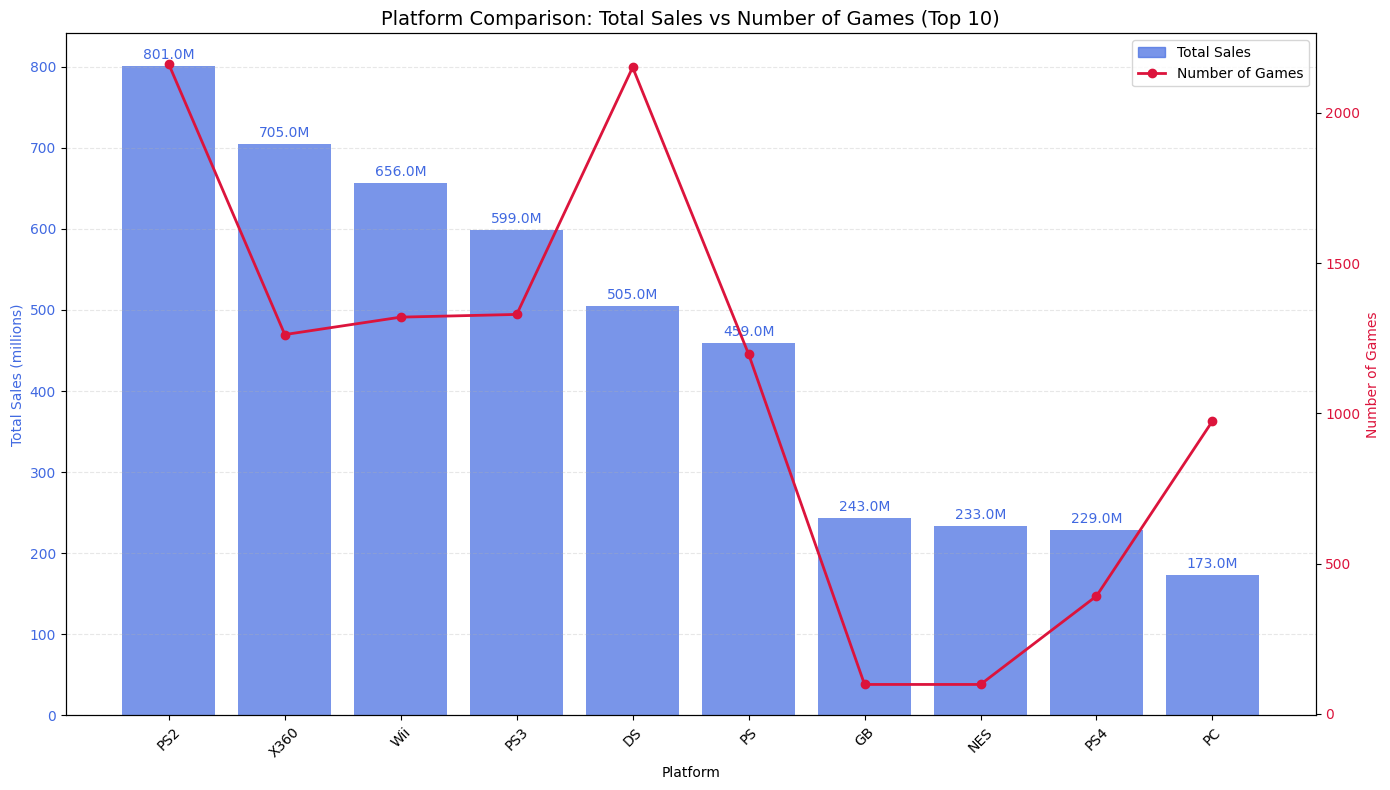

In [58]:
fig, ax1 = plt.subplots(figsize=(14, 8))

# Get top 10 platforms by total sales
top_platforms = platform_release_summary.head(10).copy()

# Plot total sales on primary axis (bars)
bars = ax1.bar(top_platforms.index, top_platforms['all_region_sales_total'], color='royalblue', alpha=0.7)
ax1.set_xlabel('Platform')
ax1.set_ylabel('Total Sales (millions)', color='royalblue')
ax1.tick_params(axis='y', labelcolor='royalblue')
plt.xticks(rotation=45)

# Create secondary axis for game count
ax2 = ax1.twinx()
line = ax2.plot(top_platforms.index, top_platforms['game_count'], marker='o', color='crimson', linewidth=2)
ax2.set_ylabel('Number of Games', color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')

# Add title
plt.title('Platform Comparison: Total Sales vs Number of Games (Top 10)', fontsize=14)

# Add legend
from matplotlib.lines import Line2D
legend_elements = [
    plt.Rectangle((0,0), 1, 1, color='royalblue', alpha=0.7),
    Line2D([0], [0], color='crimson', marker='o', linewidth=2)
]
plt.legend(legend_elements, ['Total Sales', 'Number of Games'])

# Add data labels to bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{height:.1f}M',
             ha='center', va='bottom', color='royalblue')

# Add grid
ax1.grid(axis='y', linestyle='--', alpha=0.3)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

**Top Selling Platform Sorted by GAME COUNT**

In [43]:
platform_life_span = data_files_games.groupby('platform').agg(
    years_of_release=('year_of_release', lambda x: sorted(x.dropna().unique(), reverse=True)),
    year_count=('year_of_release', lambda x: x.dropna().nunique()),
    game_count=('name', 'count'),
    na_sales_total=('na_sales', 'sum'),
    eu_sales_total=('eu_sales', 'sum'),
    jp_sales_total=('jp_sales', 'sum'),
    other_sales_total=('other_sales', 'sum'),
    all_region_sales_total=('all_region_sales', 'sum')
).sort_values(by='game_count', ascending=False)

pd.set_option('display.max_colwidth', None)
display(platform_life_span)

C:\Users\bijan\AppData\Local\Temp\ipykernel_18576\3282768401.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  platform_life_span = data_files_games.groupby('platform').agg(


,years_of_release,year_count,game_count,na_sales_total,eu_sales_total,jp_sales_total,other_sales_total,all_region_sales_total
platform,,,,,,,,
PS2,"[2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 0]",13,2161,434,199,79,89,801
DS,"[2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 1985, 0]",12,2151,222,143,118,22,505
PS3,"[2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 0]",12,1329,282,236,25,56,599
Wii,"[2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 0]",12,1320,363,206,51,36,656
X360,"[2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 0]",13,1262,497,182,0,26,705
PSP,"[2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 0]",13,1209,46,33,23,13,115
PS,"[2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 0]",11,1197,248,113,95,3,459
PC,"[2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1992, 1988, 1985, 0]",27,974,74,94,0,5,173
XB,"[2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 0]",10,824,109,18,0,0,127


**xHeader Pending**
discuss tenure in the field, top performers push out the most games, 
- This dataset reveals distinct platform lifecycles across the gaming dataset. Several key observations emerge:
Several platforms demonstrated minimal market presence of just 1 year, including GG, PSFX, and TG16.

- The PC (Windows OS platform) exhibits remarkable longevity with a 31-year presence in the dataset, yet ranks only 10th in overall sales volume.

- The PlayStation 2 emerges as the sales leader across all regions, maintaining a 12-year release cycle.

- This analysis illustrates that commercial success isn't necessarily correlated with market longevity. The PS2's dominance stems from an effective balance of strong market performance and sustained relevance over its 12-year lifespan, rather than simply existing in the marketplace for an extended period.


**Examining PC platform entries further to verify corporate affiliation(s)**

In [44]:
display(data_files_games.loc[data_files_games['platform'] == 'PC'].sort_values(by='year_of_release', ascending=False).head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_region_sales
16509,Ride 2,PC,2016,Racing,0,0,0,0,78.0,7.9,E,0
12368,Mirror's Edge Catalyst,PC,2016,Platform,0,0,0,0,74.0,4.4,T,0
16238,Fernbus Simulator,PC,2016,Simulation,0,0,0,0,71.0,7.5,Unknown,0
16201,The Technomancer,PC,2016,Role-Playing,0,0,0,0,56.0,6.8,M,0
15371,Resident Evil Zero,PC,2016,Action,0,0,0,0,71.0,7.5,Unknown,0
16423,Cities: Skylines Snowfall,PC,2016,Simulation,0,0,0,0,72.0,7.1,Unknown,0
15407,Pro Evolution Soccer 2017,PC,2016,Sports,0,0,0,0,69.0,3.7,E,0
14400,DiRT Rally,PC,2016,Racing,0,0,0,0,86.0,8.7,E,0
14185,Need for Speed (2015),PC,2016,Racing,0,0,0,0,71.0,7.5,Unknown,0
14375,Song of the Deep,PC,2016,Action,0,0,0,0,73.0,6.3,E,0


**Upon review, the PC platform is manufactured by Microsoft**

###  **Section 5**
- **Data Analysis and Visualizations**

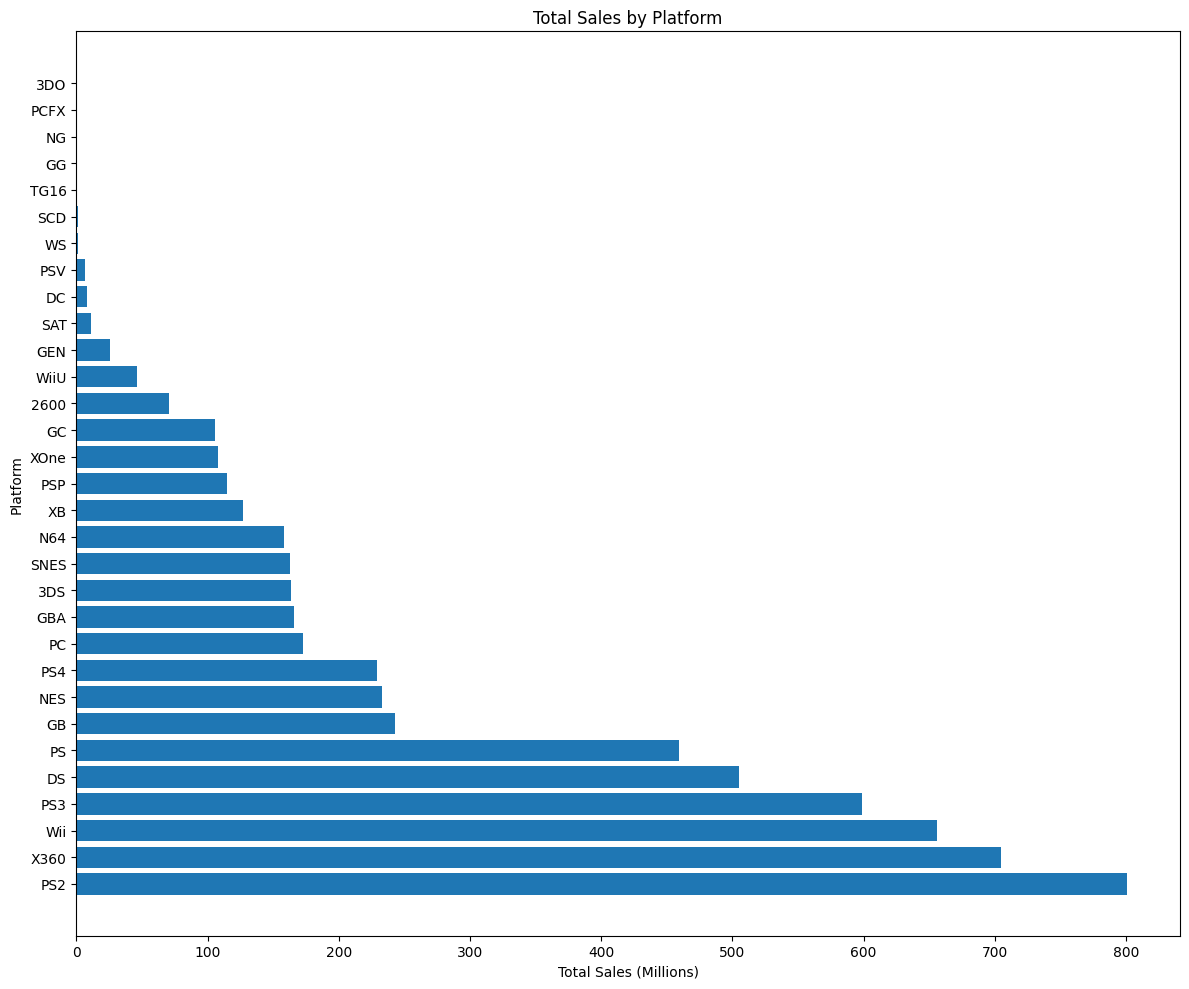

In [45]:
plt.figure(figsize=(12, 10))
plt.barh(platform_release_summary.index, platform_release_summary['all_region_sales_total'])

plt.gca().invert_yaxis()

plt.xlabel('Total Sales (Millions)')
plt.ylabel('Platform')
plt.title('Total Sales by Platform')
plt.tight_layout()

plt.show()

This bar chart shows the sum of all game sales for each platform (cumulative/total sales)
- PS2 is the highest total sales across all games 

**Distribution of Game Sales by Platform**

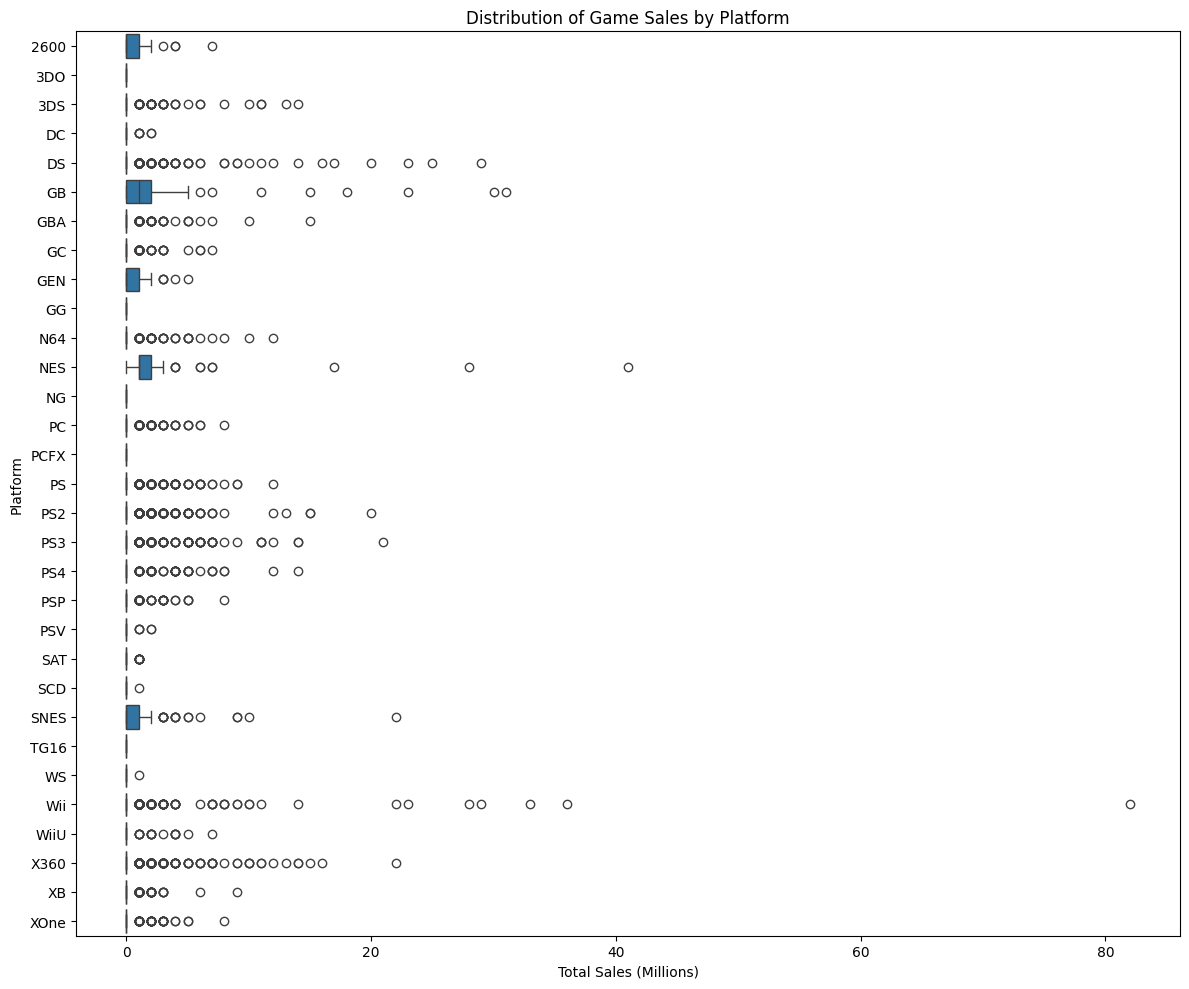

In [61]:
data_files_games['total_sales'] = data_files_games['na_sales'] + data_files_games['eu_sales'] + \
                                 data_files_games['jp_sales'] + data_files_games['other_sales']

plt.figure(figsize=(12, 10))

sns.boxplot(x='total_sales', y='platform', data=data_files_games, orient='h')

plt.xlabel('Total Sales (Millions)')
plt.ylabel('Platform')
plt.title('Distribution of Game Sales by Platform')
plt.tight_layout()
plt.show()

The boxplot showed the distribution of individual game sales, where Wii had the single highest-selling title (~80M)
- Wii has the single highest-selling INDIVIDUAL game (greatest individual hit)

**Platform Life Span: Game Releases Over Years**

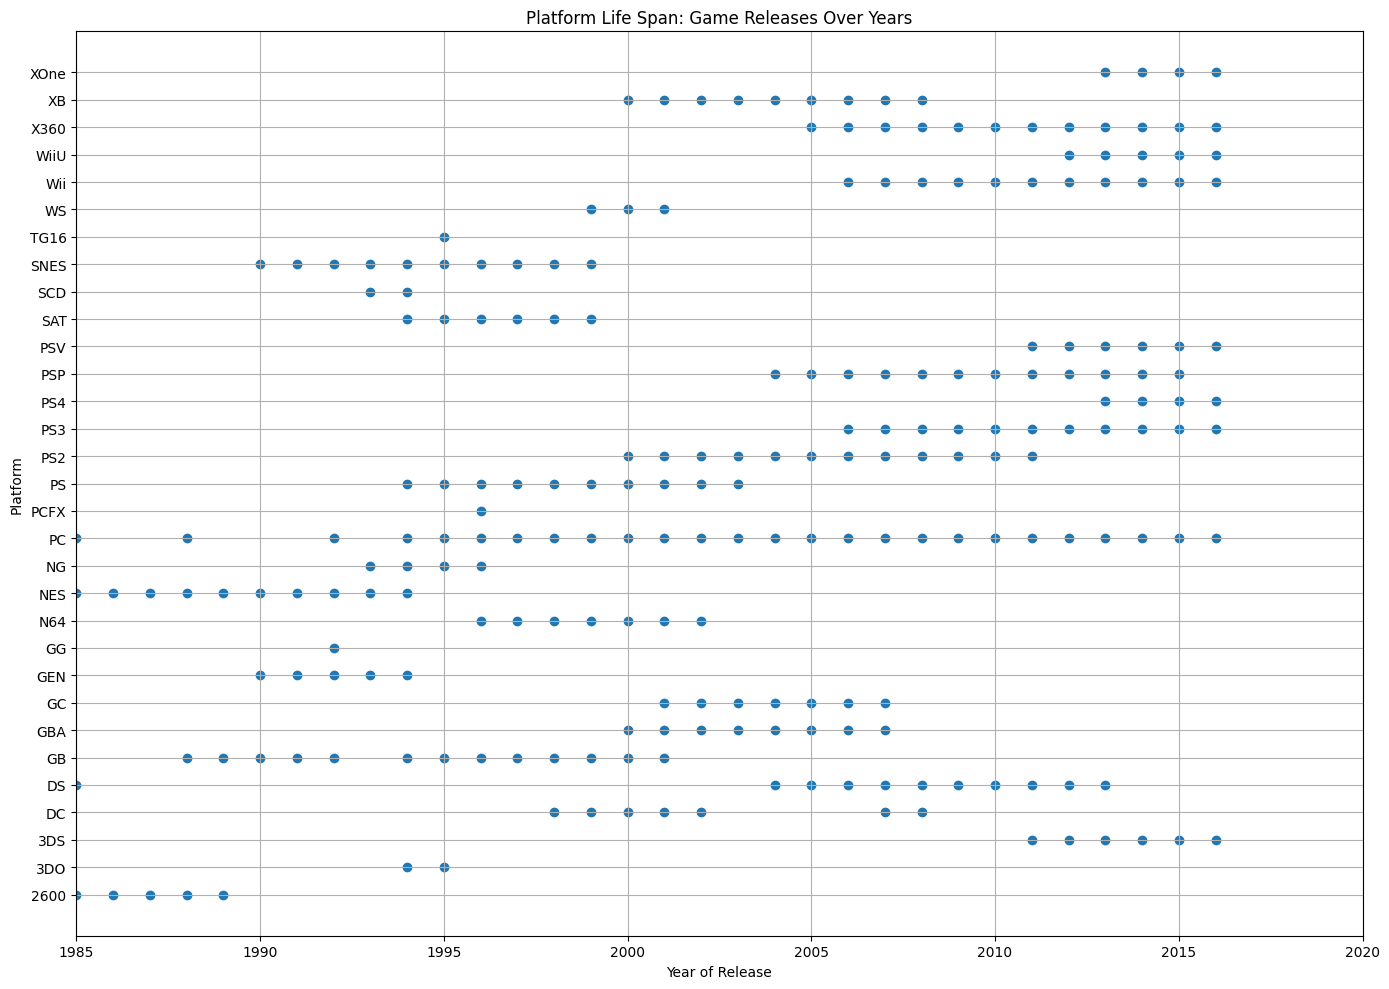

In [46]:
platform_cycle_visual = platform_life_span.reset_index()
platform_cycle_visual = platform_cycle_visual.explode('years_of_release')
platform_cycle_visual = platform_cycle_visual.rename(columns={'index': 'platform', 'years_of_release': 'year'})
platform_cycle_visual = platform_cycle_visual[platform_cycle_visual['year'] != 0]
platform_cycle_visual = platform_cycle_visual.sort_values(by='platform')
plt.figure(figsize=(14, 10))
plt.scatter(platform_cycle_visual['year'], platform_cycle_visual['platform'], marker='o')
plt.xlabel('Year of Release')
plt.ylabel('Platform')
plt.title('Platform Life Span: Game Releases Over Years')
plt.grid(True)
plt.xlim(1985, 2020)
plt.tight_layout()
plt.show()

The first patterns emerged confirming that many of the platforms belong to the same company. At first glance, the playstation platform portfolio emerges along with the microsoft portfolio of platforms

**PS2 Analysis**<br>
- Part of Playstation Portfolio<br>

- This analysis evaluates gaming platforms by total sales volume, illuminating each platform's market impact. Among the 31 platforms examined, the PlayStation 2 stands out with remarkable commercial success—801 million units sold during its 12-year market presence (2000-2012).
  - The PlayStation brand exhibits a calculated release cadence. The original PlayStation entered the market in the mid-1990s, with Sony introducing newer generations while existing models maintained active market presence. The PS2 launched during the original PlayStation's active period and remained commercially viable until approximately 2011. Sony continued this approach with the PS3, which debuted during the PS2's prime years. - This suggests an intentional strategy of introducing new hardware approximately every decade, though with lifecycle durations slightly under 12 years. The PS4 data (2012-2016) follows this established pattern.
The analysis confirms the PS2's dominant position within the PlayStation lineup. Additionally, it reveals how overlapping product lifecycles and strategically timed mid-cycle releases may influence sales performance and platform longevity across the PlayStation brand portfolio.

**X360 Analysis**<br>
- Part of Microsoft Portfolio<br>

- This analysis evaluates gaming platforms by total sales volume, illuminating each platform's market impact. Among the 31 platforms examined, the PlayStation 2 stands out with remarkable commercial success—801 million units sold during its 12-year market presence (2000-2012).
  - The PlayStation brand exhibits a calculated release cadence. The original PlayStation entered the market in the mid-1990s, with Sony introducing newer generations while existing models maintained active market presence. The PS2 launched during the original PlayStation's active period and remained commercially viable until approximately 2011. Sony continued this approach with the PS3, which debuted during the PS2's prime years. - This suggests an intentional strategy of introducing new hardware approximately every decade, though with lifecycle durations slightly under 12 years. The PS4 data (2012-2016) follows this established pattern.
The analysis confirms the PS2's dominant position within the PlayStation lineup. Additionally, it reveals how overlapping product lifecycles and strategically timed mid-cycle releases may influence sales performance and platform longevity across the PlayStation brand portfolio.

Nintendo, Sega follow the same model while a few one off platforms lifspan fall below this datasets lifespan cycle. This observation will be discussed in more detail below.

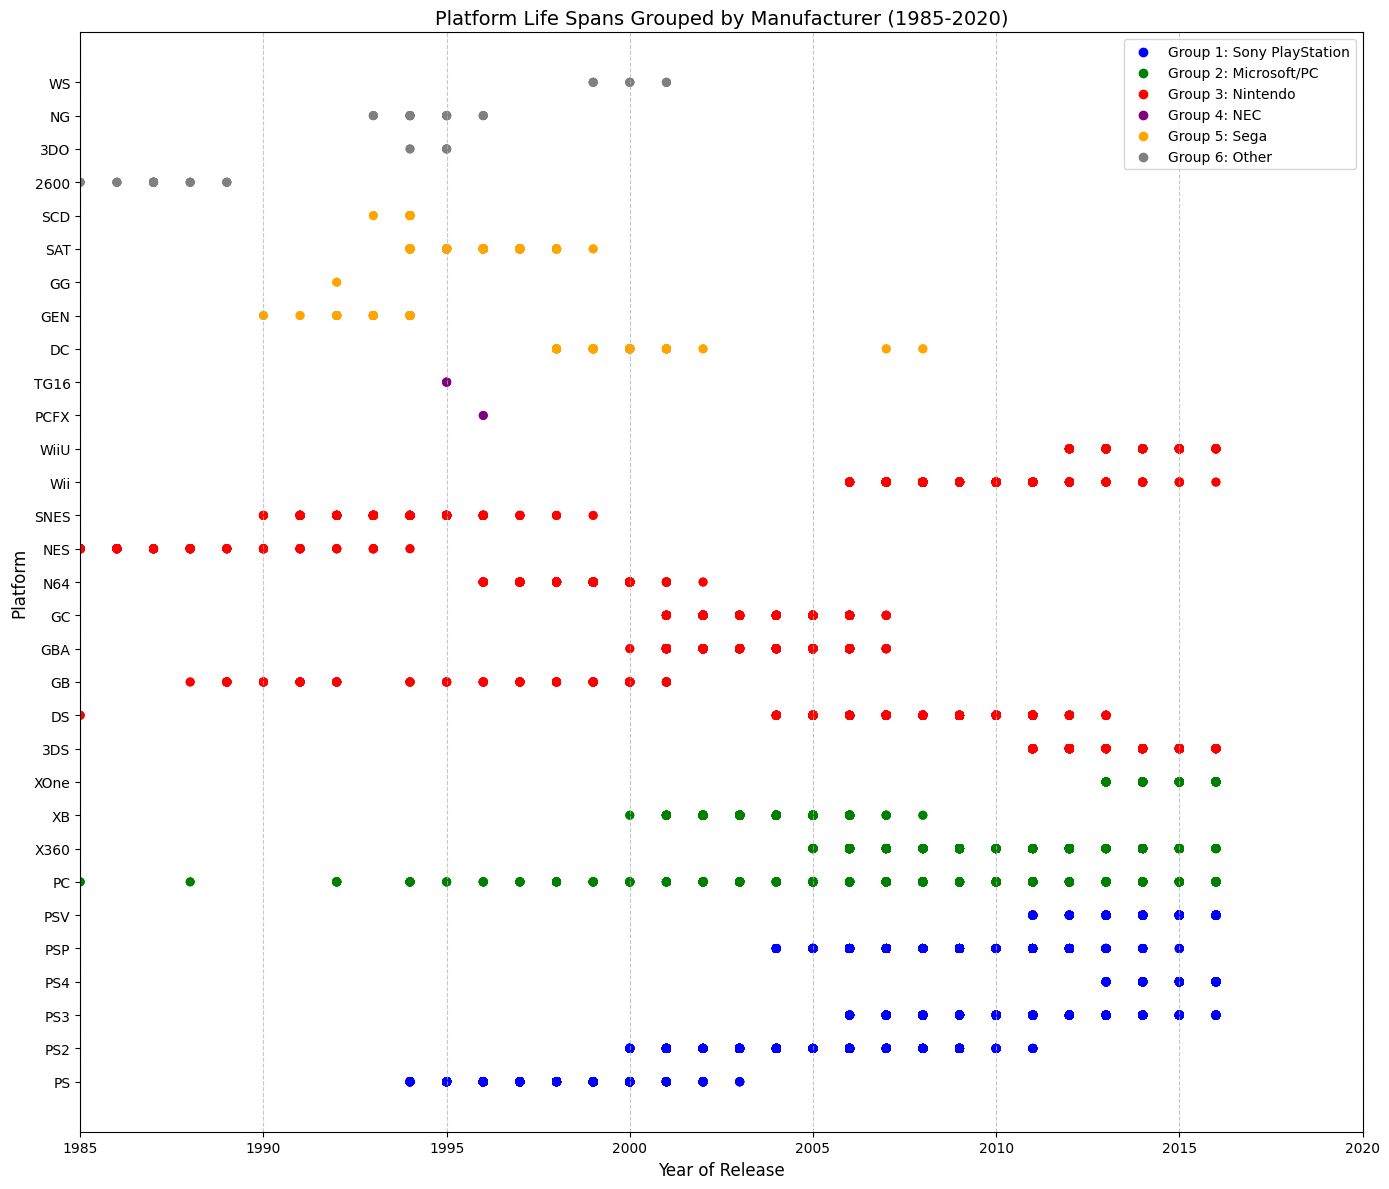

In [47]:
platform_grouped_visual = data_files_games.reset_index()
platform_grouped_visual = platform_grouped_visual.copy()  
platform_grouped_visual = platform_grouped_visual.rename(columns={'year_of_release': 'year'})  
platform_grouped_visual = platform_grouped_visual[platform_grouped_visual['year'] != 0]

# Create a group column based on the specified groupings
conditions = [
    # Group 1: Sony
    platform_grouped_visual['platform'].isin(['PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV']),
    # Group 2: Microsoft/PC
    platform_grouped_visual['platform'].isin(['PC', 'XB', 'X360', 'XOne']),
    # Group 3: Nintendo
    platform_grouped_visual['platform'].isin(['NES', 'GB', 'SNES', 'N64', 'GBA', 'GC', 'DS', 'Wii', '3DS', 'WiiU']),
    # Group 4: NEC
    platform_grouped_visual['platform'].isin(['TG16', 'PCFX']),
    # Group 5: Sega
    platform_grouped_visual['platform'].isin(['GEN', 'SAT', 'DC', 'SCD', 'GG']),
    # Group 6: Other
    platform_grouped_visual['platform'].isin(['WS', 'NG', '3DO', '2600'])
]

choices = [
    'Group 1: Sony PlayStation', 
    'Group 2: Microsoft/PC', 
    'Group 3: Nintendo', 
    'Group 4: NEC',
    'Group 5: Sega', 
    'Group 6: Other'
]

platform_grouped_visual['group'] = np.select(conditions, choices, default='Other')

# Create a combined field for sorting
platform_grouped_visual['sort_key'] = platform_grouped_visual['group'] + platform_grouped_visual['platform'].astype(str)
platform_grouped_visual = platform_grouped_visual.sort_values(by='sort_key')

# Create the plot
plt.figure(figsize=(14, 12))

# Define colors for each group
colors = {
    'Group 1: Sony PlayStation': 'blue',
    'Group 2: Microsoft/PC': 'green',
    'Group 3: Nintendo': 'red',
    'Group 4: NEC': 'purple',
    'Group 5: Sega': 'orange',
    'Group 6: Other': 'gray'
}

# Create the scatter plot
plt.scatter(
    platform_grouped_visual['year'],
    platform_grouped_visual['sort_key'],
    c=platform_grouped_visual['group'].map(colors),
    marker='o',
    s=30
)

# Extract unique platform/group combinations for y-ticks
unique_platforms = platform_grouped_visual[['platform', 'sort_key', 'group']].drop_duplicates()
unique_platforms = unique_platforms.sort_values('sort_key')


# Set custom y-ticks and labels
plt.yticks(
    range(len(unique_platforms)),
    unique_platforms['platform'],
    fontsize=10
)

# Fix the y-axis position mapping
plt.scatter(
    platform_grouped_visual['year'],
    pd.Categorical(platform_grouped_visual['sort_key'], 
                   categories=unique_platforms['sort_key'], 
                   ordered=True).codes,
    c=platform_grouped_visual['group'].map(colors),
    marker='o',
    s=30
)

# Add a legend using dummy scatter plots
legend_elements = []
for group, color in colors.items():
    legend_elements.append(plt.scatter([], [], color=color, label=group))

plt.legend(handles=legend_elements, loc='upper right')

# Customize the plot
plt.xlabel('Year of Release', fontsize=12)
plt.ylabel('Platform', fontsize=12)
plt.title('Platform Life Spans Grouped by Manufacturer (1985-2020)', fontsize=14) # extending the x-axis range to 2020  to include all data points through 2016 and provide some visual margin
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.xlim(1985, 2020)
plt.tight_layout()

plt.show()

- The dataset shows that the gaming platform industry is dominated by a small number of companies, primarily based in Japan with a few notable U.S. competitors. Sony, the company behind PlayStation, has established remarkable market presence with four platforms in the top 10: the PS2 (ranked 1st as the best-selling platform in the dataset), PS3 (4th), PS (6th), and PS4 (9th).
- Microsoft, the sole U.S. company in the top rankings, secured significant positions with the Xbox 360 (2nd) and PC Windows OS platform (10th). Notably, the PC platform demonstrates exceptional longevity with a 16-year lifecycle—the longest among all 17 platforms analyzed. While our dataset concludes in 2016, this remarkable sustainability deserves recognition.
 - Nintendo rounds out the top 10 with four platforms: the Wii (3rd) and DS (5th) both placing in the top five, while the Game Boy (GB) and Nintendo Entertainment System (NES) rank 7th and 8th respectively."

In [48]:
data_files_games_x0 = data_files_games[data_files_games['year_of_release'] !=0]

avg_platform_lifespan = data_files_games_x0.groupby('platform')['year_of_release'].nunique()

avg_lifespan = avg_platform_lifespan.mean()
display(f"Average Platform Lifecycle: {avg_lifespan:.2f} years")

C:\Users\bijan\AppData\Local\Temp\ipykernel_18576\850814241.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_platform_lifespan = data_files_games_x0.groupby('platform')['year_of_release'].nunique()


'Average Platform Lifecycle: 7.68 years'

**Recalculating the dataset without the outlier PC which spans 31 years**

In [49]:
data_files_games_x0 = data_files_games[data_files_games['year_of_release'] != 0]

data_files_games_xPC = data_files_games_x0[data_files_games_x0['platform'] != 'PC']

avg_platform_lifespan_xPC = data_files_games_xPC.groupby('platform')['year_of_release'].nunique()

avg_lifespan_xPC = avg_platform_lifespan_xPC.mean()

display(f"Average Platform Lifecycle (excluding PC data): {avg_lifespan_xPC:.2f} years")

C:\Users\bijan\AppData\Local\Temp\ipykernel_18576\1148707920.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_platform_lifespan_xPC = data_files_games_xPC.groupby('platform')['year_of_release'].nunique()


'Average Platform Lifecycle (excluding PC data): 6.84 years'

**Impact of PC Platform Exclusion on Average Gaming Hardware Lifecycles**<br>
After removing the PC platform (an outlier with a 31-year lifespan), the average platform lifespan decreased from 7.68 to 6.84 years – a reduction of just 0.84 years or approximately 10.9%.
This relatively modest change, despite eliminating such an extreme outlier, can be attributed to two key factors:
  - The dilution effect across 31 distinct platforms, which minimizes the impact of any single outlier
  - The concentration of most platform lifespans up to the 12 year range, creating a robust central tendency
This analysis confirms that the gaming hardware market operates on a fairly consistent lifecycle pattern. Platforms typically enter and exit the market within a predictable timeframe, regardless of exceptional cases like the PC platform's extended presence.

In [50]:
data_files_games_x0 = data_files_games[data_files_games['year_of_release'] != 0]

ps_family = ['PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV']
ps_data = data_files_games_x0[data_files_games_x0['platform'].isin(ps_family)]

ps_family_lifespans = ps_data.groupby('platform')['year_of_release'].agg(lambda x: x.max() - x.min() + 1)
ps_avg_lifespan = ps_family_lifespans.mean()
display(f"Average Platform Lifecycle (PS family): {ps_avg_lifespan:.2f} years")

C:\Users\bijan\AppData\Local\Temp\ipykernel_18576\3674570488.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ps_family_lifespans = ps_data.groupby('platform')['year_of_release'].agg(lambda x: x.max() - x.min() + 1)


'Average Platform Lifecycle (PS family): 9.17 years'

**Sony PlayStation's Extended Market Presence: Outperforming Industry Averages**<br>
The PlayStation faportfolio of systems (PS, PS2, PS3, PS4, PSP, and PSV) – which includes the dataset's top-selling platform, the PS2 – demonstrates an average market presence of 9.17 years. This duration exceeds the all-inclusive platform average by 1.49 years and surpasses the platform average (excluding PC data) by 2.33 years, highlighting Sony's ability of maintaining longer platform lifecycles against its competitors.

**Top 10 Genre-Platform Combinations by Total Sales**

C:\Users\bijan\AppData\Local\Temp\ipykernel_18576\3593583337.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_platform_sales = data_files_games.groupby(['genre', 'platform'])['all_region_sales'].sum().reset_index()


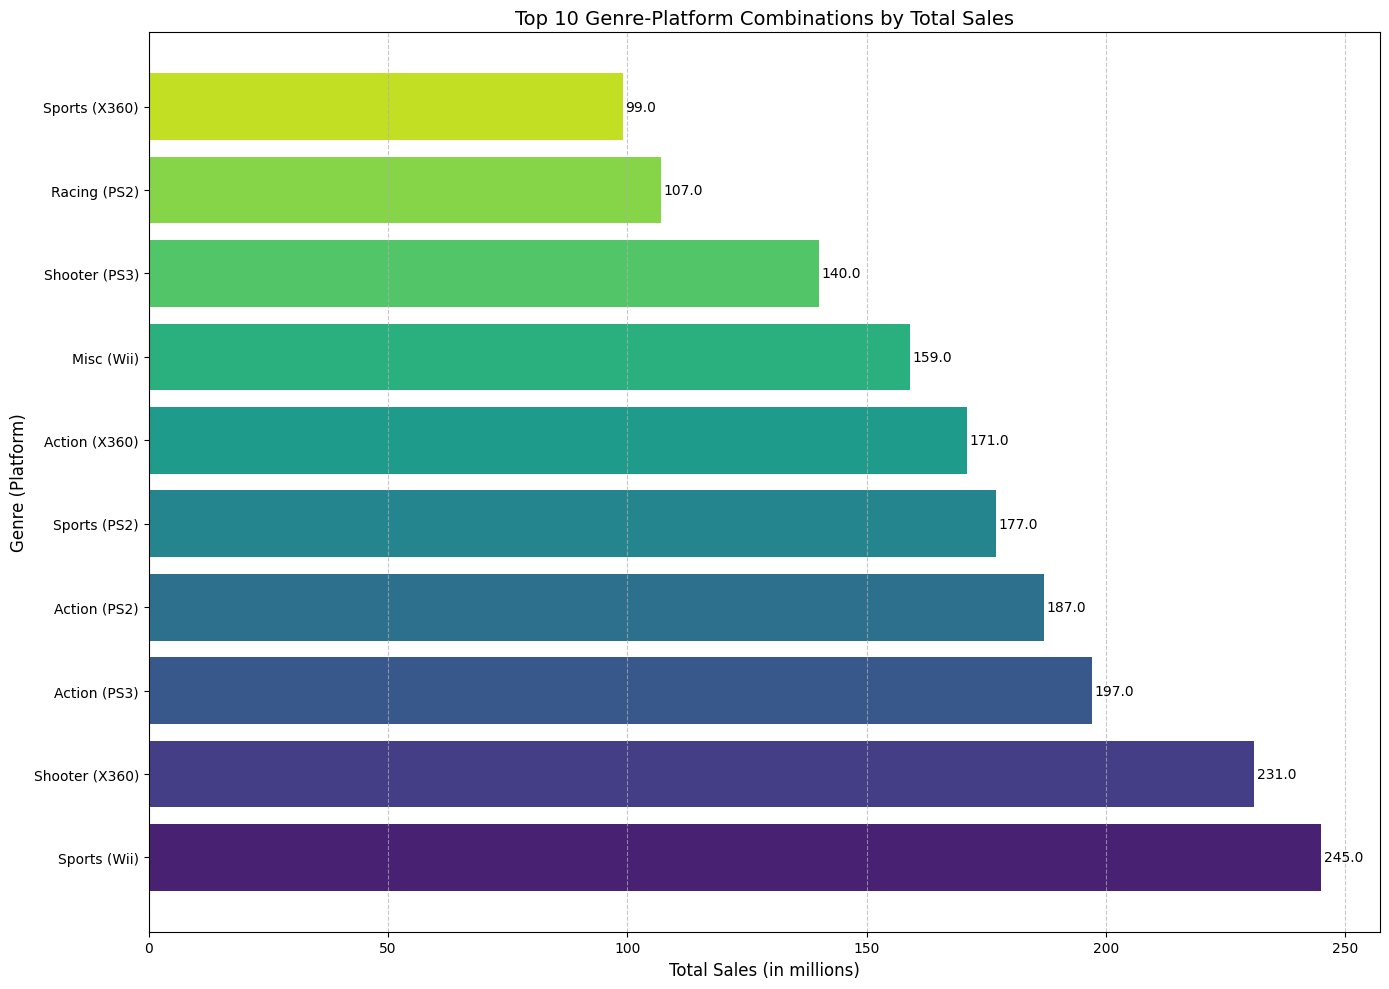

In [51]:
genre_platform_sales = data_files_games.groupby(['genre', 'platform'])['all_region_sales'].sum().reset_index()

# Sort by sales and get top 15 combinations
top_combinations = genre_platform_sales.sort_values('all_region_sales', ascending=False).head(10)

# Create a figure with appropriate size
plt.figure(figsize=(14, 10))

# Create a horizontal bar chart
bars = plt.barh(
    y=range(len(top_combinations)),
    width=top_combinations['all_region_sales'],
    color=sns.color_palette('viridis', len(top_combinations))
)

# Create combined labels for genre-platform
combo_labels = [f"{genre} ({platform})" for genre, platform in 
                zip(top_combinations['genre'], top_combinations['platform'])]

# Set the y-tick labels to the combined labels
plt.yticks(range(len(top_combinations)), combo_labels)

# Add labels and title
plt.xlabel('Total Sales (in millions)', fontsize=12)
plt.ylabel('Genre (Platform)', fontsize=12)
plt.title('Top 10 Genre-Platform Combinations by Total Sales', fontsize=14)

# Add the sales values at the end of each bar
for i, v in enumerate(top_combinations['all_region_sales']):
    plt.text(v + 0.5, i, f'{v:.1f}', va='center')

# Add a grid for easier reading
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

**Total Sales by Genre Across All Platforms**

C:\Users\bijan\AppData\Local\Temp\ipykernel_18576\3937985263.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_sales = data_files_games.groupby('genre')['total_sales'].sum().reset_index()


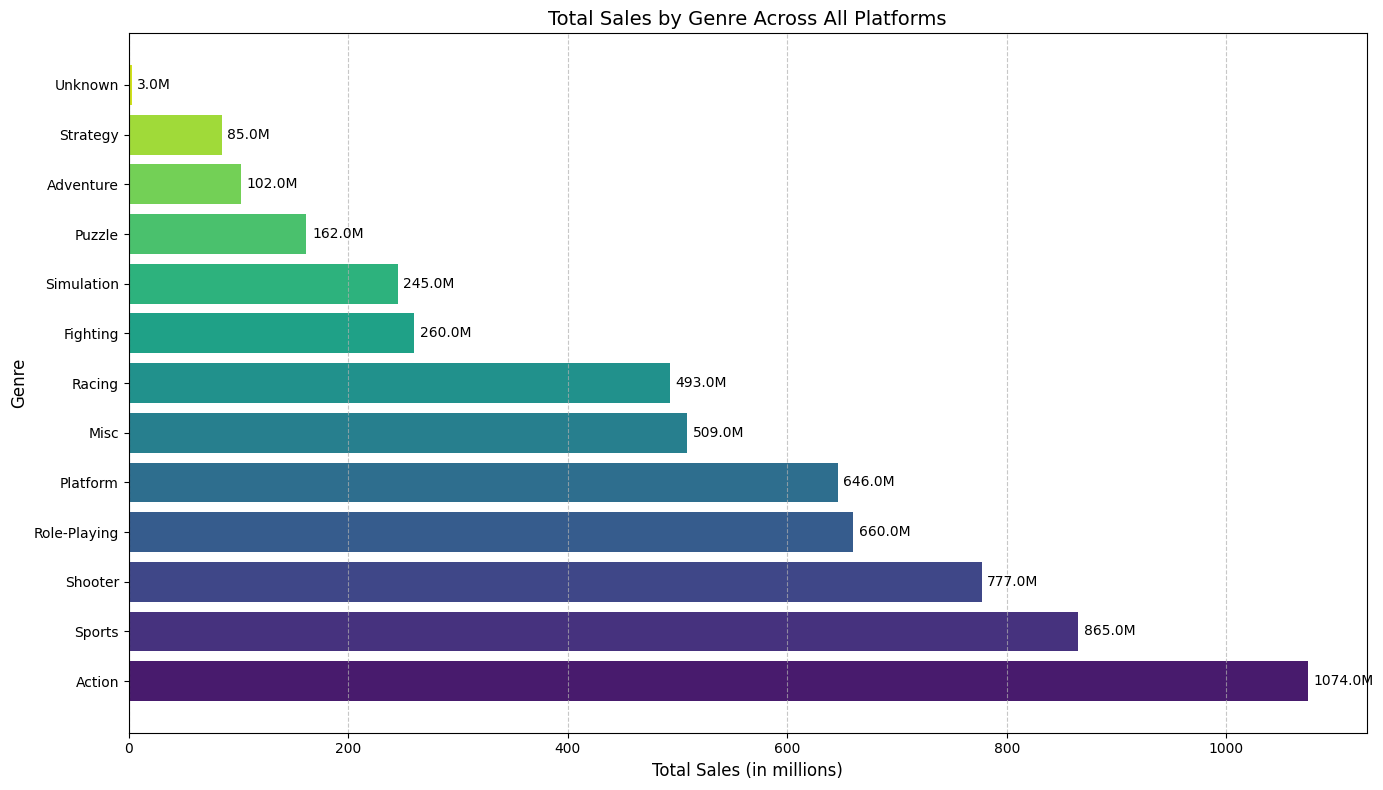

In [63]:
genre_sales = data_files_games.groupby('genre')['total_sales'].sum().reset_index()

genre_sales = genre_sales.sort_values('total_sales', ascending=False)

plt.figure(figsize=(14, 8))

bars = plt.barh(
    y=genre_sales['genre'],
    width=genre_sales['total_sales'],
    color=sns.color_palette('viridis', len(genre_sales))
)

plt.xlabel('Total Sales (in millions)', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.title('Total Sales by Genre Across All Platforms', fontsize=14)

for i, v in enumerate(genre_sales['total_sales']):
    plt.text(v + 5, i, f'{v:.1f}M', va='center')

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Sales Distribution of Top Genres Across Top Platforms**

C:\Users\bijan\AppData\Local\Temp\ipykernel_18576\3003370925.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_platform_sales = top_genre_data.groupby(['genre', 'platform'])['total_sales'].sum().reset_index()
C:\Users\bijan\AppData\Local\Temp\ipykernel_18576\3003370925.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_platforms = data_files_games.groupby('platform')['total_sales'].sum().nlargest(5).index.tolist()


<Figure size 1400x1000 with 0 Axes>

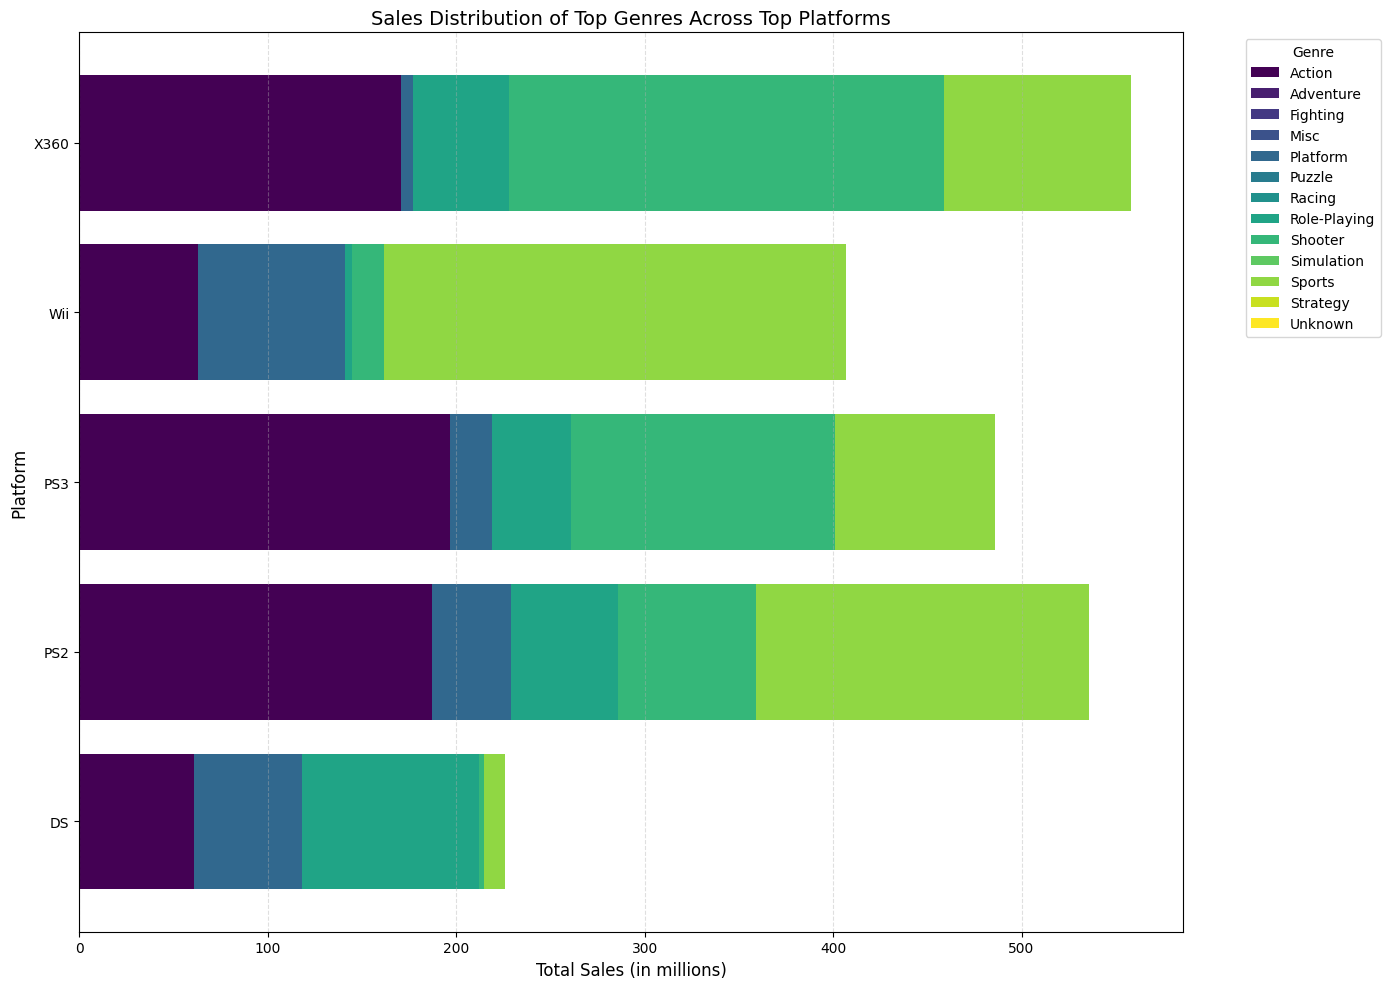

In [64]:
top_genres = genre_sales.head(5)['genre'].tolist()

top_genre_data = data_files_games[data_files_games['genre'].isin(top_genres)]

genre_platform_sales = top_genre_data.groupby(['genre', 'platform'])['total_sales'].sum().reset_index()

top_platforms = data_files_games.groupby('platform')['total_sales'].sum().nlargest(5).index.tolist()

genre_platform_top = genre_platform_sales[genre_platform_sales['platform'].isin(top_platforms)]

pivot_data = genre_platform_top.pivot(index='platform', columns='genre', values='total_sales').fillna(0)

plt.figure(figsize=(14, 10))
pivot_data.plot(kind='barh', stacked=True, figsize=(14, 10), 
                colormap='viridis', width=0.8)

plt.xlabel('Total Sales (in millions)', fontsize=12)
plt.ylabel('Platform', fontsize=12)
plt.title('Sales Distribution of Top Genres Across Top Platforms', fontsize=14)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

Dewscribe above visual

**Sales vs. Scores for Top Genre-Platform Combinations**

C:\Users\bijan\AppData\Local\Temp\ipykernel_18576\673393069.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  genre_platform_data = data_files_games.groupby(['genre', 'platform']).agg({


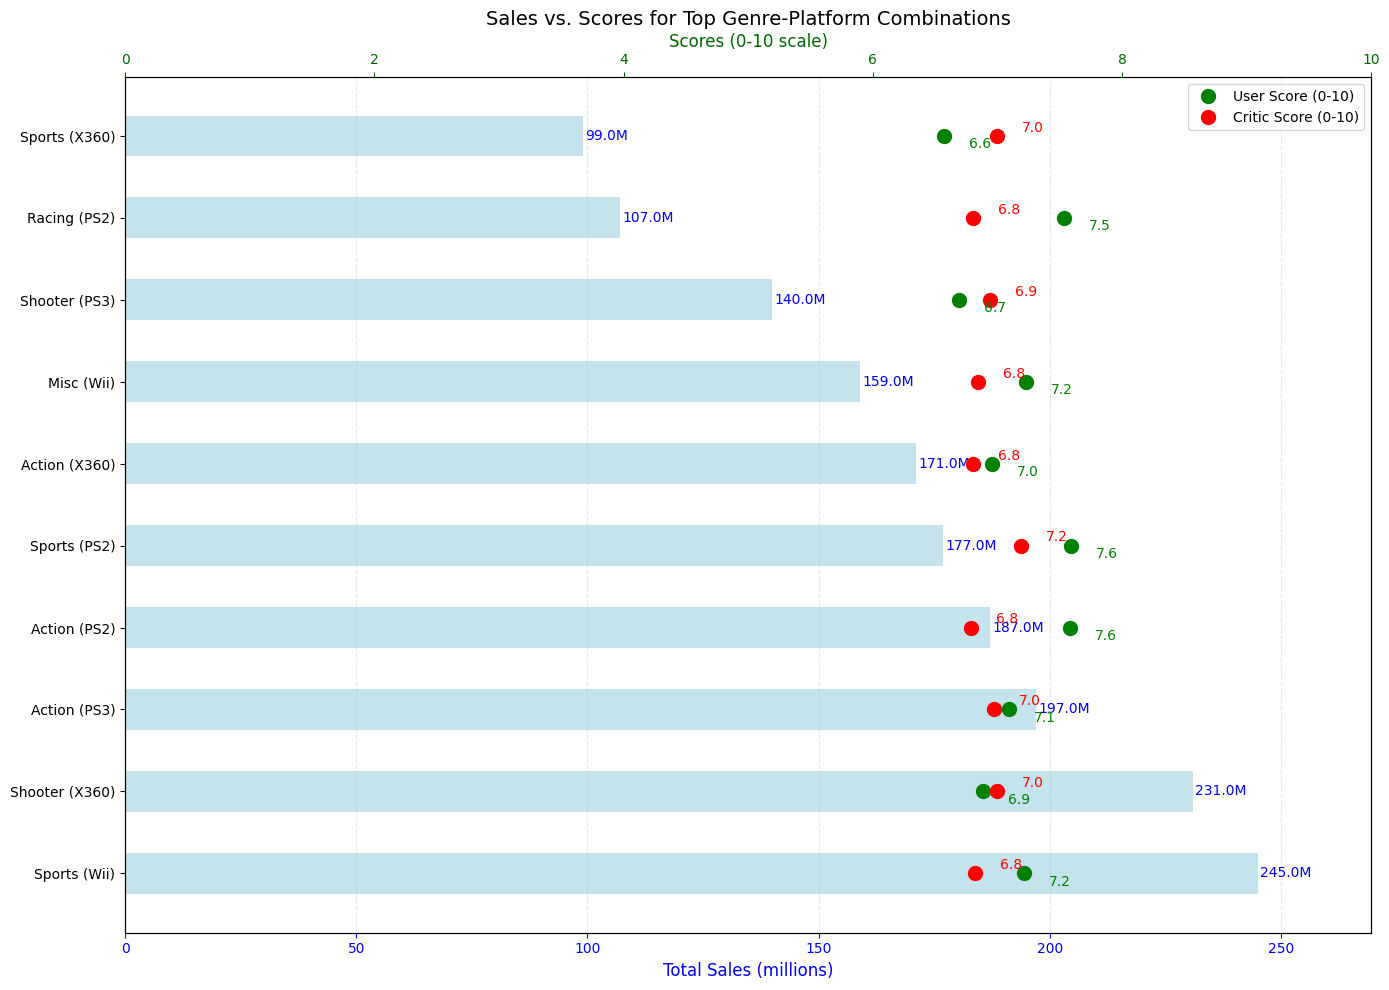

In [52]:
genre_platform_data = data_files_games.groupby(['genre', 'platform']).agg({
    'all_region_sales': 'sum',
    'user_score': 'mean',
    'critic_score': 'mean'
}).reset_index()

# Sort by sales and get top 15 combinations
top_combinations = genre_platform_data.sort_values('all_region_sales', ascending=False).head(10)

# Create labels for the y-axis (genre-platform combinations)
combo_labels = [f"{genre} ({platform})" for genre, platform in 
                zip(top_combinations['genre'], top_combinations['platform'])]

# Set up the figure with two x-axes
fig, ax1 = plt.subplots(figsize=(14, 10))

# Plot the sales bars
bars = ax1.barh(range(len(top_combinations)), top_combinations['all_region_sales'], 
                color='lightblue', alpha=0.7, height=0.5)

# Set up a second axis that shares the y-axis
ax2 = ax1.twiny()

# Scale the critic score from 0-100 to 0-10 for comparison with user score
critic_score_scaled = top_combinations['critic_score'] / 10

# Plot the scores as points
ax2.scatter(top_combinations['user_score'], range(len(top_combinations)), 
            color='green', s=100, label='User Score (0-10)')
ax2.scatter(critic_score_scaled, range(len(top_combinations)), 
            color='red', s=100, label='Critic Score (0-10)')

# Configure the primary axis (sales)
ax1.set_yticks(range(len(top_combinations)))
ax1.set_yticklabels(combo_labels)
ax1.set_xlabel('Total Sales (millions)', fontsize=12, color='blue')
ax1.tick_params(axis='x', colors='blue')
ax1.set_xlim(0, top_combinations['all_region_sales'].max() * 1.1)

# Add sales values to the end of each bar
for i, v in enumerate(top_combinations['all_region_sales']):
    ax1.text(v + 0.5, i, f'{v:.1f}M', va='center', color='blue')

# Configure the secondary axis (scores)
ax2.set_xlim(0, 10)
ax2.set_xlabel('Scores (0-10 scale)', fontsize=12, color='darkgreen')
ax2.tick_params(axis='x', colors='darkgreen')

# Add score values next to each point
for i, (user, critic) in enumerate(zip(top_combinations['user_score'], critic_score_scaled)):
    ax2.text(user + 0.2, i - 0.1, f'{user:.1f}', va='center', color='green')
    ax2.text(critic + 0.2, i + 0.1, f'{critic:.1f}', va='center', color='red')

# Add a grid for easier reading
ax1.grid(axis='x', linestyle='--', alpha=0.3)

# Add title and legend
plt.title('Sales vs. Scores for Top Genre-Platform Combinations', fontsize=14)
ax2.legend(loc='upper right')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

**Game Sales vs Ratings: Market Performance Appears Independent of Rating Metrics**

Upon examining the visualization, the difference between user and critic scores varies from 0.1 to 1.0 points across genre-platform combinations. Key observations about the scores:

- User scores: range approximately from 6.6 to 7.6 (on a 0-10 scale)
- Critic scores: range approximately from 6.8 to 7.2 (on a 0-100 scale)

Notably, none of the top-selling genre-platform combinations exceeded an 8.0 rating from either critics or users. This suggests that the most commercially successful games aren't necessarily the most<br>
highly rated. Both critics (who typically evaluate technical execution and design) and users (who focus on experience and value) seem to rate these bestselling titles as good but not exceptional, mostly<br>
falling in the 'above average' range rather than 'excellent' territory. 

Lastly, this observation is made on a subset of data allowing for the possibility that a different pattern can emerge with more comprehensive data.

**Section 4.2 Data Analysis**
 - Diagnostic Analytics

In [53]:
data_files_games[data_files_games['year_of_release'] >= 2011].nunique()

name                2418
platform              12
year_of_release        6
genre                 12
na_sales              11
eu_sales               8
jp_sales               5
other_sales            4
critic_score          75
user_score            86
rating                 7
all_region_sales      17
dtype: int64

In [54]:
sorted(data_files_games[data_files_games['year_of_release'] >= 2011]['genre'].unique())

['Action',
 'Adventure',
 'Fighting',
 'Misc',
 'Platform',
 'Puzzle',
 'Racing',
 'Role-Playing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy']

In [55]:
#data_files_games2 = data_files_games.set_index(['Name', 'Platform']).sort_index(level=['Name', 'Platform'])

**'NA Sales by Top 5 Platforms and Genres (in Millions)**

C:\Users\bijan\AppData\Local\Temp\ipykernel_18576\2430787208.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_platforms = data_files_games.groupby('platform')['na_sales'].sum().nlargest(5)
C:\Users\bijan\AppData\Local\Temp\ipykernel_18576\2430787208.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  platform_scores = data_files_games[data_files_games['platform'].isin(top_platforms_list)].groupby('platform').agg({


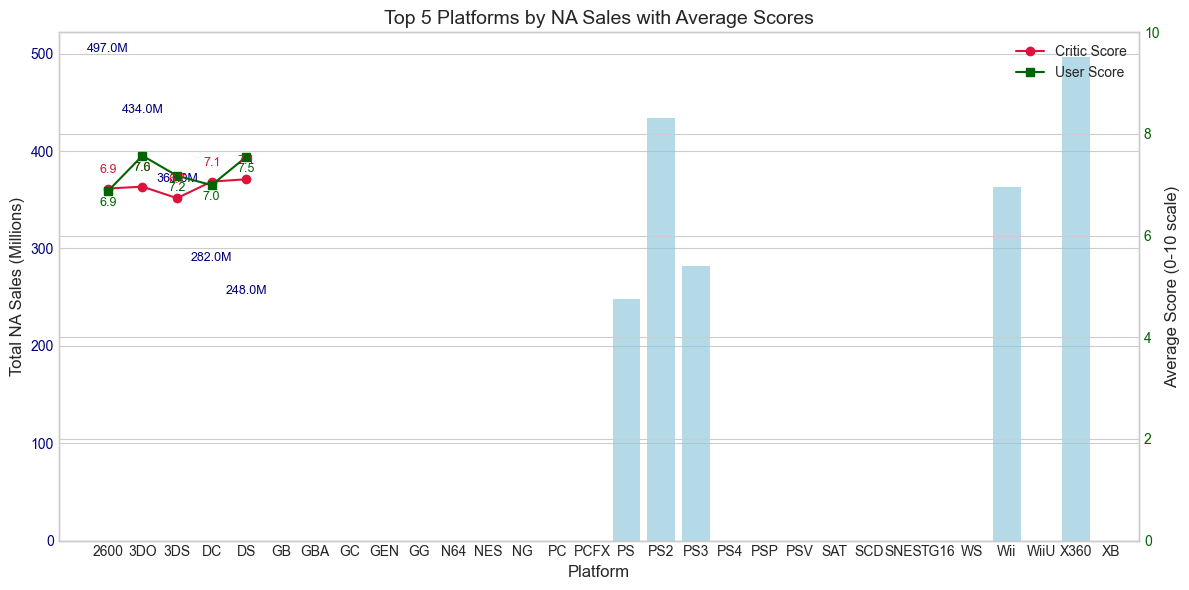

In [75]:
plt.style.use('seaborn-v0_8-whitegrid')

top_platforms = data_files_games.groupby('platform')['na_sales'].sum().nlargest(5)
top_platforms_list = top_platforms.index.tolist()

# Calculate average critic and user scores for each top platform
platform_scores = data_files_games[data_files_games['platform'].isin(top_platforms_list)].groupby('platform').agg({
    'critic_score': 'mean',
    'user_score': 'mean'
}).reindex(top_platforms.index)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot bar chart on primary y-axis
sns.barplot(x=top_platforms.index, y=top_platforms.values, ax=ax1, alpha=0.7, color='skyblue')
ax1.set_ylabel('Total NA Sales (Millions)', fontsize=12)
ax1.set_xlabel('Platform', fontsize=12)
ax1.tick_params(axis='y', labelcolor='navy')

ax2 = ax1.twinx()

ax2.plot(range(len(platform_scores)), platform_scores['critic_score']/10, 'o-', color='crimson', label='Critic Score')

ax2.plot(range(len(platform_scores)), platform_scores['user_score'], 's-', color='darkgreen', label='User Score')

ax2.set_ylabel('Average Score (0-10 scale)', fontsize=12)
ax2.set_ylim(0, 10)
ax2.tick_params(axis='y', labelcolor='darkgreen')

plt.title('Top 5 Platforms by NA Sales with Average Scores', fontsize=14)
ax2.legend(loc='upper right')

for i, v in enumerate(top_platforms.values):
    ax1.text(i, v + 5, f"{v:.1f}M", ha='center', fontsize=9, color='navy')

for i, (critic, user) in enumerate(zip(platform_scores['critic_score']/10, platform_scores['user_score'])):
    ax2.text(i, critic + 0.3, f"{critic:.1f}", ha='center', fontsize=9, color='crimson')
    ax2.text(i, user - 0.3, f"{user:.1f}", ha='center', fontsize=9, color='darkgreen')

plt.tight_layout()
plt.show()

**Total NA Sales (Millions)**

C:\Users\bijan\AppData\Local\Temp\ipykernel_18576\1581041700.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_genres = data_files_games.groupby('genre')['na_sales'].sum().nlargest(5)


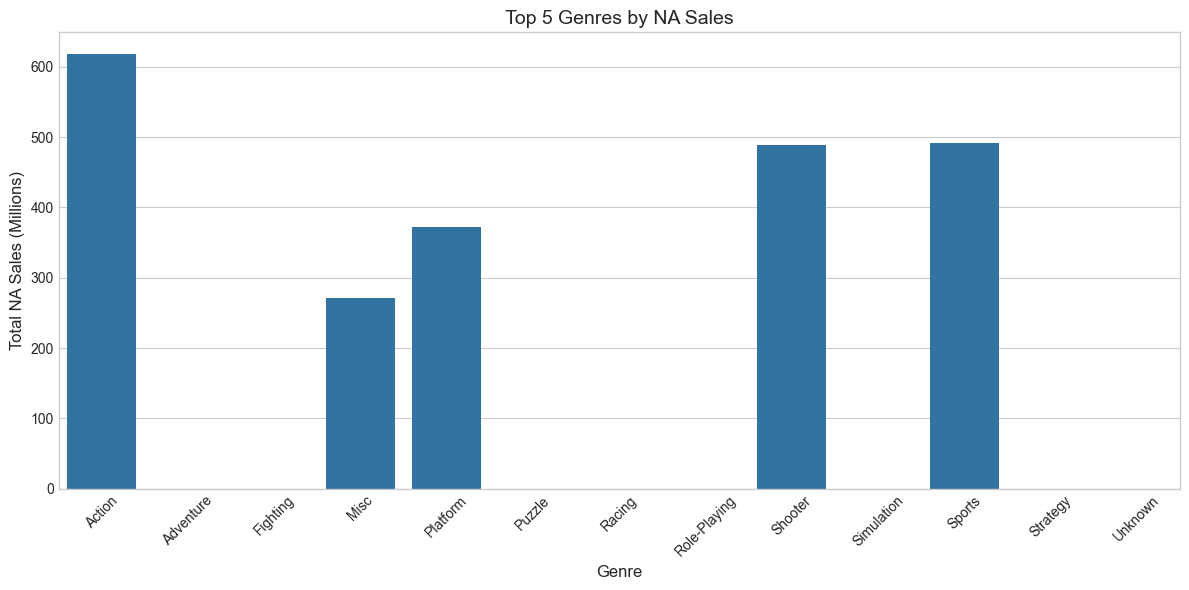

In [67]:
plt.figure(figsize=(12, 6))
top_genres = data_files_games.groupby('genre')['na_sales'].sum().nlargest(5)
sns.barplot(x=top_genres.index, y=top_genres.values)
plt.title('Top 5 Genres by NA Sales', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Total NA Sales (Millions)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**NA Sales by Release Year**

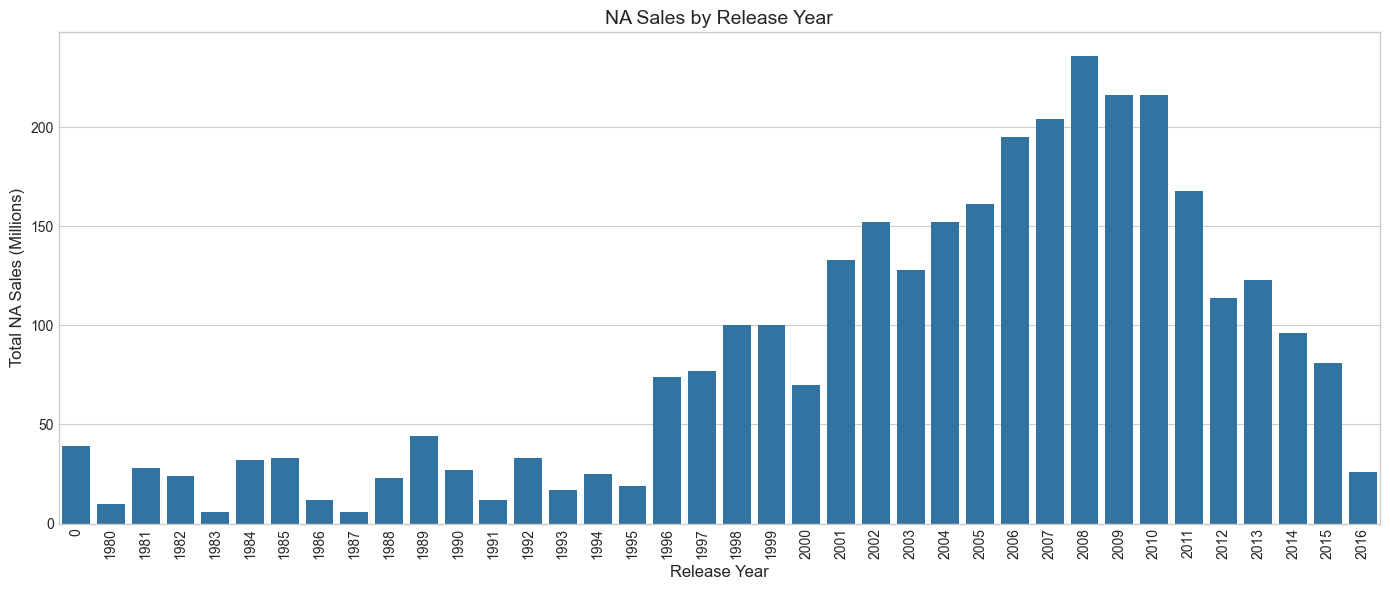

In [ ]:
plt.figure(figsize=(14, 6))
yearly_sales = data_files_games.groupby('year_of_release')['na_sales'].sum()
sns.barplot(x=yearly_sales.index, y=yearly_sales.values)
plt.title('NA Sales by Release Year', fontsize=14)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Total NA Sales (Millions)', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Top 5 Platforms by EU Sales**

C:\Users\bijan\AppData\Local\Temp\ipykernel_18576\2281938615.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_platforms_eu = data_files_games.groupby('platform')['eu_sales'].sum().nlargest(5)
C:\Users\bijan\AppData\Local\Temp\ipykernel_18576\2281938615.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  platform_scores_eu = data_files_games[data_files_games['platform'].isin(top_platforms_eu_list)].groupby('platform').agg({


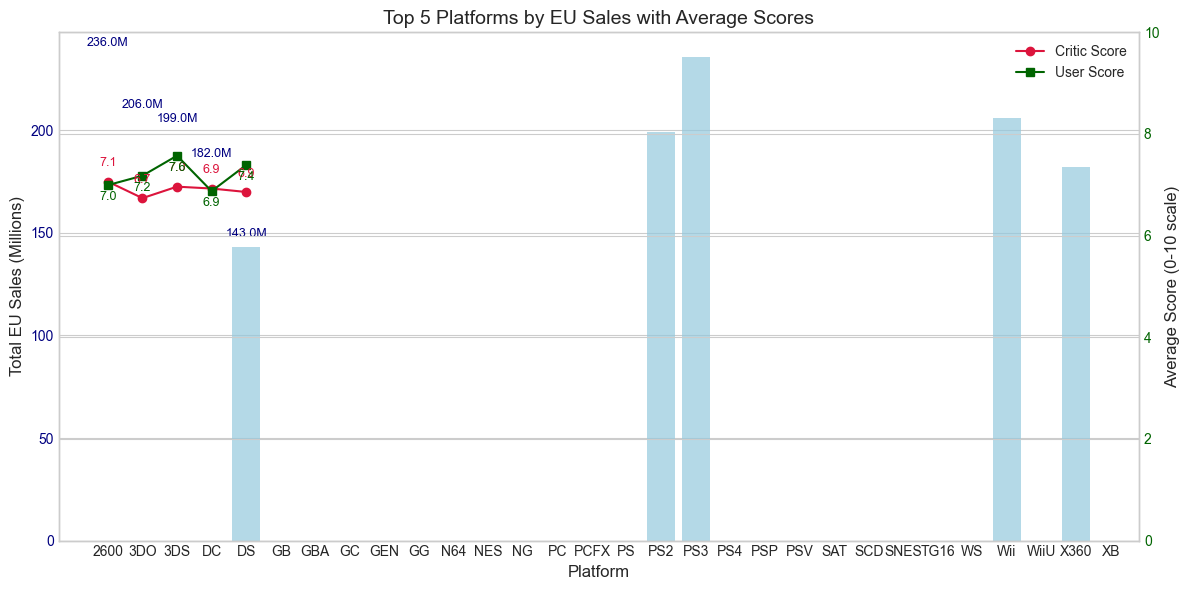

In [76]:
plt.style.use('seaborn-v0_8-whitegrid')

top_platforms_eu = data_files_games.groupby('platform')['eu_sales'].sum().nlargest(5)
top_platforms_eu_list = top_platforms_eu.index.tolist()

platform_scores_eu = data_files_games[data_files_games['platform'].isin(top_platforms_eu_list)].groupby('platform').agg({
    'critic_score': 'mean',
    'user_score': 'mean'
}).reindex(top_platforms_eu.index)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot bar chart on primary y-axis
sns.barplot(x=top_platforms_eu.index, y=top_platforms_eu.values, ax=ax1, alpha=0.7, color='skyblue')
ax1.set_ylabel('Total EU Sales (Millions)', fontsize=12)
ax1.set_xlabel('Platform', fontsize=12)
ax1.tick_params(axis='y', labelcolor='navy')

ax2 = ax1.twinx()

ax2.plot(range(len(platform_scores_eu)), platform_scores_eu['critic_score']/10, 'o-', color='crimson', label='Critic Score')

# Plot user scores as a line with markers
ax2.plot(range(len(platform_scores_eu)), platform_scores_eu['user_score'], 's-', color='darkgreen', label='User Score')

ax2.set_ylabel('Average Score (0-10 scale)', fontsize=12)
ax2.set_ylim(0, 10)
ax2.tick_params(axis='y', labelcolor='darkgreen')

plt.title('Top 5 Platforms by EU Sales with Average Scores', fontsize=14)
ax2.legend(loc='upper right')

for i, v in enumerate(top_platforms_eu.values):
    ax1.text(i, v + 5, f"{v:.1f}M", ha='center', fontsize=9, color='navy')

for i, (critic, user) in enumerate(zip(platform_scores_eu['critic_score']/10, platform_scores_eu['user_score'])):
    ax2.text(i, critic + 0.3, f"{critic:.1f}", ha='center', fontsize=9, color='crimson')
    ax2.text(i, user - 0.3, f"{user:.1f}", ha='center', fontsize=9, color='darkgreen')

plt.tight_layout()
plt.show()


**Top 5 Genres by EU Sales**

C:\Users\bijan\AppData\Local\Temp\ipykernel_18576\1851813505.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_genres_eu = data_files_games.groupby('genre')['eu_sales'].sum().nlargest(5)


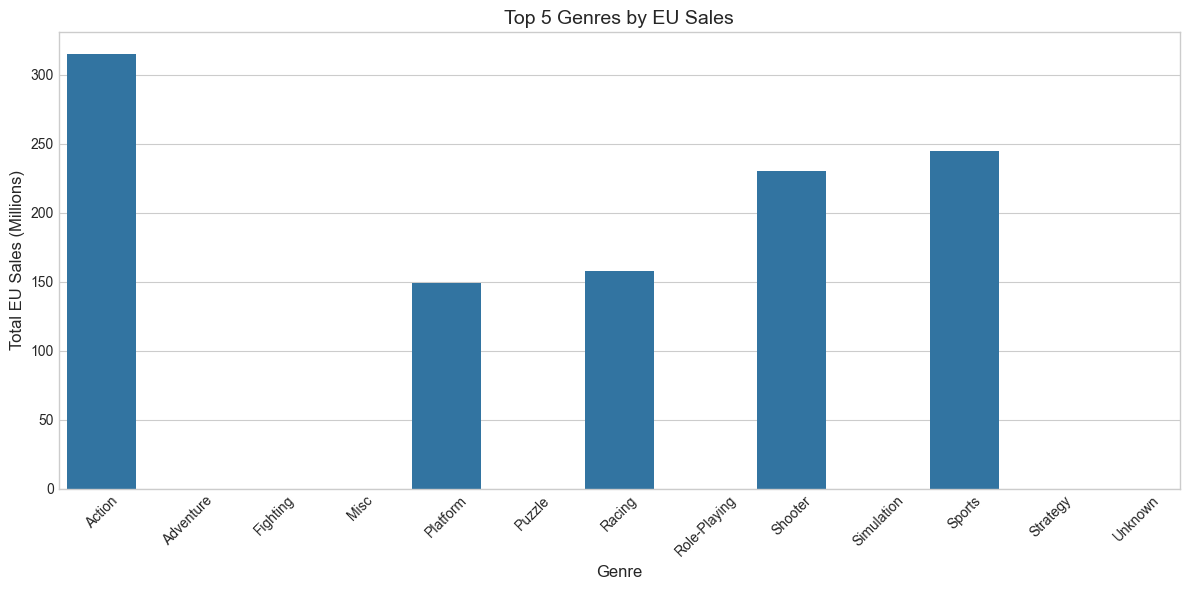

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(12, 6))
top_genres_eu = data_files_games.groupby('genre')['eu_sales'].sum().nlargest(5)
sns.barplot(x=top_genres_eu.index, y=top_genres_eu.values)
plt.title('Top 5 Genres by EU Sales', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Total EU Sales (Millions)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**EU Sales by Release Year**

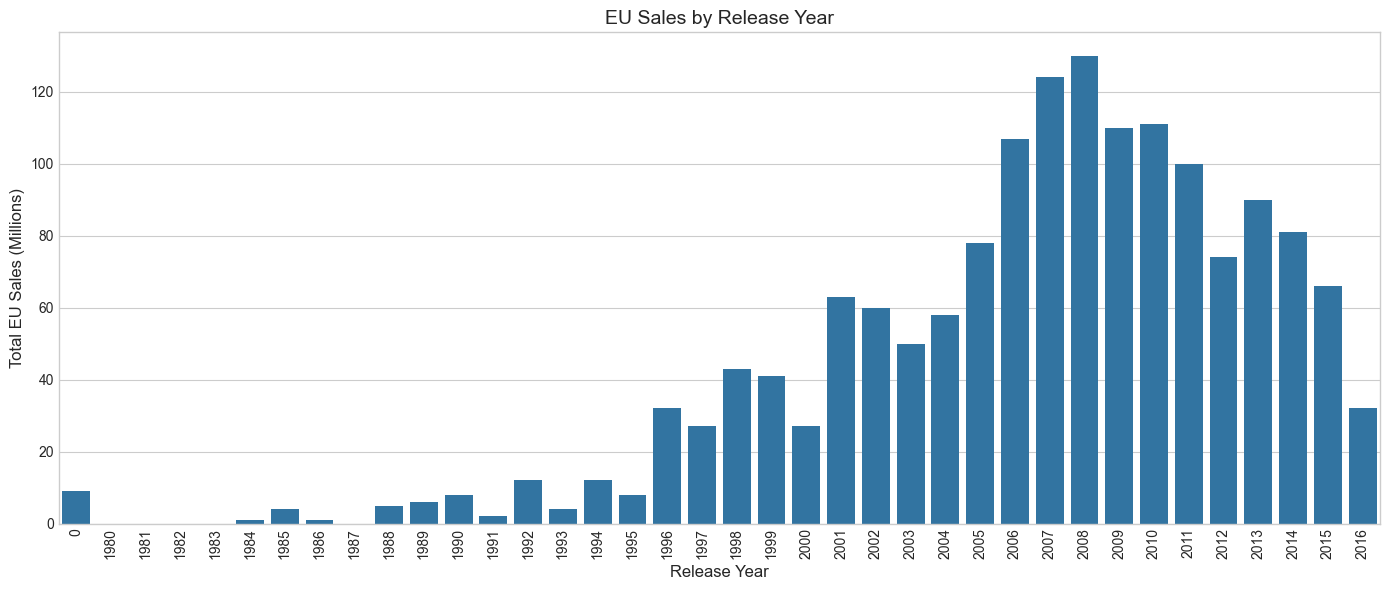

In [ ]:
plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(14, 6))
yearly_sales_eu = data_files_games.groupby('year_of_release')['eu_sales'].sum()
sns.barplot(x=yearly_sales_eu.index, y=yearly_sales_eu.values)
plt.title('EU Sales by Release Year', fontsize=14)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Total EU Sales (Millions)', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Top 5 Platforms by Japan Sales**

C:\Users\bijan\AppData\Local\Temp\ipykernel_18576\1585831862.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_platforms_jp = data_files_games.groupby('platform')['jp_sales'].sum().nlargest(5)
C:\Users\bijan\AppData\Local\Temp\ipykernel_18576\1585831862.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  platform_scores_jp = data_files_games[data_files_games['platform'].isin(top_platforms_jp_list)].groupby('platform').agg({


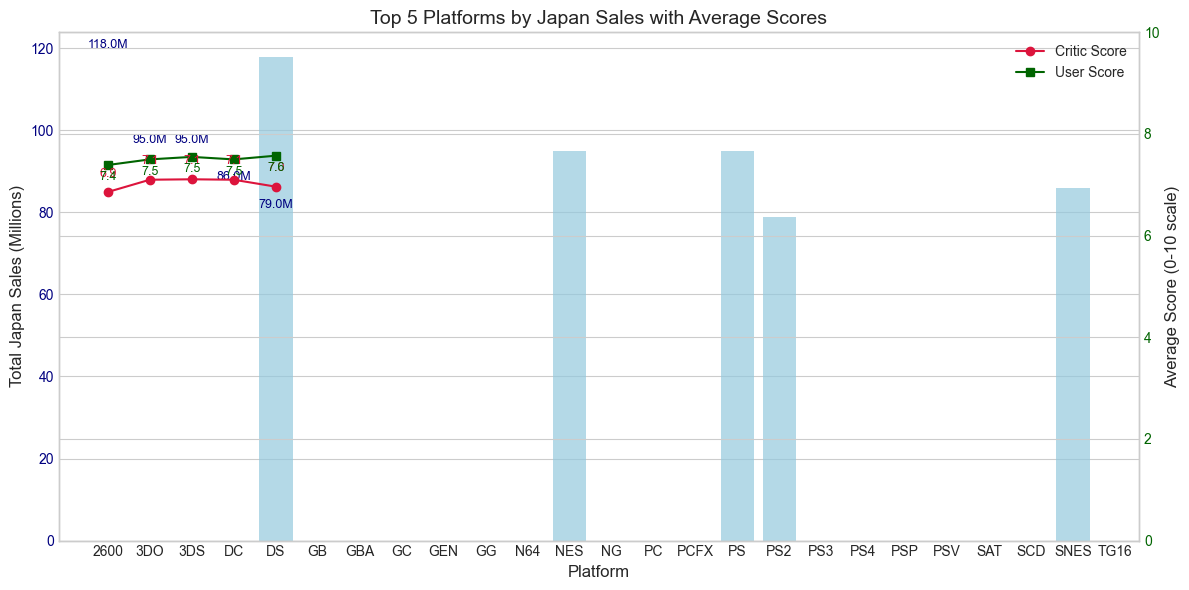

In [77]:
plt.style.use('seaborn-v0_8-whitegrid')

top_platforms_jp = data_files_games.groupby('platform')['jp_sales'].sum().nlargest(5)
top_platforms_jp_list = top_platforms_jp.index.tolist()

platform_scores_jp = data_files_games[data_files_games['platform'].isin(top_platforms_jp_list)].groupby('platform').agg({
    'critic_score': 'mean',
    'user_score': 'mean'
}).reindex(top_platforms_jp.index)

fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot(x=top_platforms_jp.index, y=top_platforms_jp.values, ax=ax1, alpha=0.7, color='skyblue')
ax1.set_ylabel('Total Japan Sales (Millions)', fontsize=12)
ax1.set_xlabel('Platform', fontsize=12)
ax1.tick_params(axis='y', labelcolor='navy')

ax2 = ax1.twinx()

ax2.plot(range(len(platform_scores_jp)), platform_scores_jp['critic_score']/10, 'o-', color='crimson', label='Critic Score')

ax2.plot(range(len(platform_scores_jp)), platform_scores_jp['user_score'], 's-', color='darkgreen', label='User Score')

ax2.set_ylabel('Average Score (0-10 scale)', fontsize=12)
ax2.set_ylim(0, 10)
ax2.tick_params(axis='y', labelcolor='darkgreen')

plt.title('Top 5 Platforms by Japan Sales with Average Scores', fontsize=14)
ax2.legend(loc='upper right')

for i, v in enumerate(top_platforms_jp.values):
    ax1.text(i, v + 2, f"{v:.1f}M", ha='center', fontsize=9, color='navy')

for i, (critic, user) in enumerate(zip(platform_scores_jp['critic_score']/10, platform_scores_jp['user_score'])):
    ax2.text(i, critic + 0.3, f"{critic:.1f}", ha='center', fontsize=9, color='crimson')
    ax2.text(i, user - 0.3, f"{user:.1f}", ha='center', fontsize=9, color='darkgreen')

plt.tight_layout()
plt.show()

**Top 5 Genres by Japan Sales**

C:\Users\bijan\AppData\Local\Temp\ipykernel_18576\3574717381.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_genres_jp = data_files_games.groupby('genre')['jp_sales'].sum().nlargest(5)


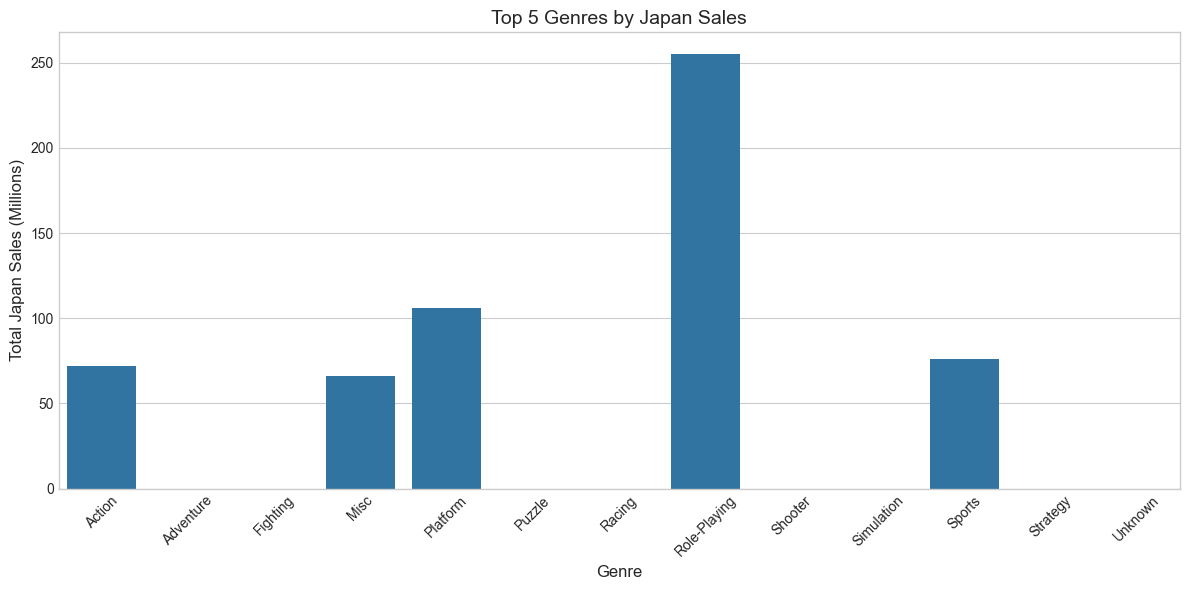

In [73]:
plt.figure(figsize=(12, 6))
top_genres_jp = data_files_games.groupby('genre')['jp_sales'].sum().nlargest(5)
sns.barplot(x=top_genres_jp.index, y=top_genres_jp.values)
plt.title('Top 5 Genres by Japan Sales', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Total Japan Sales (Millions)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Japan Sales by Release Year**

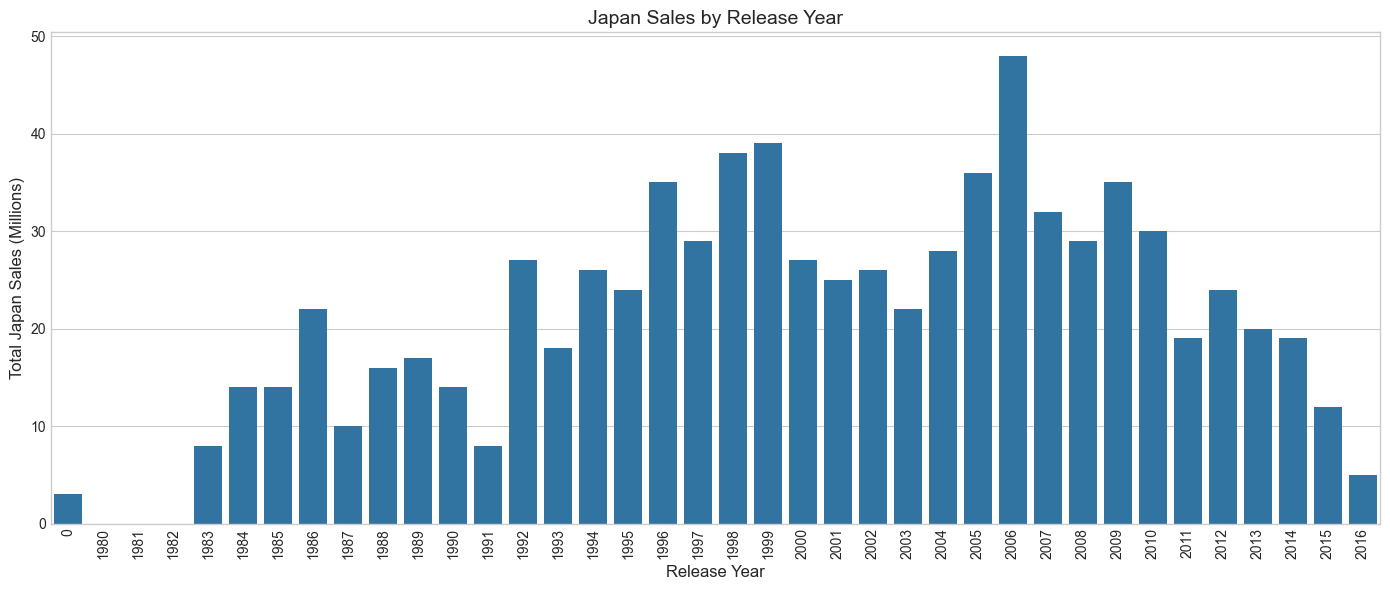

In [74]:
plt.figure(figsize=(14, 6))
yearly_sales_jp = data_files_games.groupby('year_of_release')['jp_sales'].sum()
sns.barplot(x=yearly_sales_jp.index, y=yearly_sales_jp.values)
plt.title('Japan Sales by Release Year', fontsize=14)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Total Japan Sales (Millions)', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Hypothesis Testing for Platform User Ratings**

Xbox One sample size: 247
PC sample size: 974

Xbox One mean user score: 6.78, std dev: 1.26
PC mean user score: 7.15, std dev: 1.37
Difference in means: 0.38

Hypotheses:
H₀: The average user ratings for Xbox One and PC are equal
H₁: The average user ratings for Xbox One and PC are different

T-test results:
t-statistic: -3.9005
p-value: 0.0001

With alpha = 0.05
We reject the null hypothesis – there is a significant difference in average user ratings between Xbox One and PC.


C:\Users\bijan\AppData\Local\Temp\ipykernel_18576\2063955768.py:40: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=['Xbox One', 'PC'])


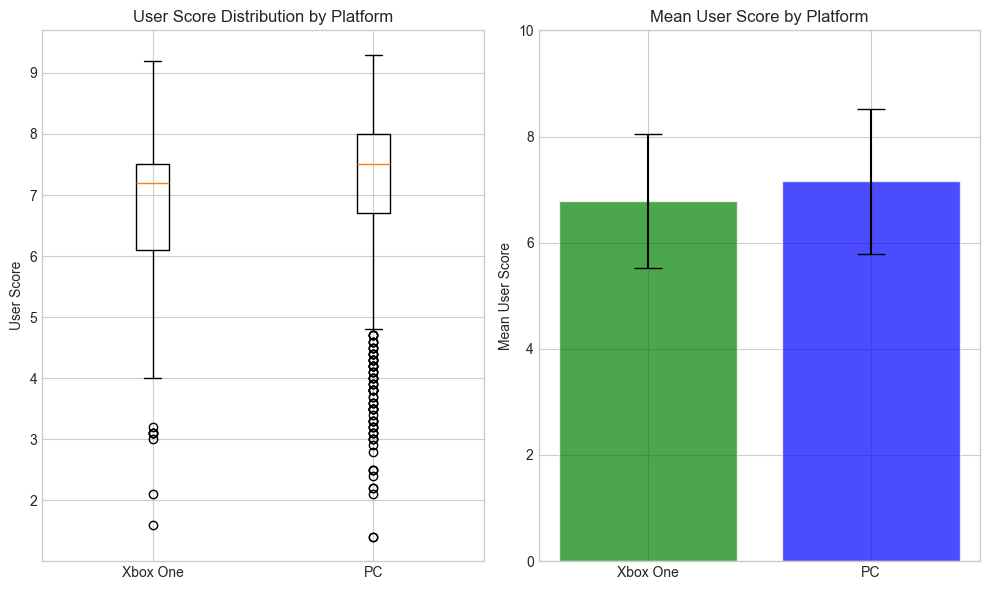

In [80]:
xboxone_data = data_files_games[data_files_games['platform'] == 'XOne']['user_score']
pc_data = data_files_games[data_files_games['platform'] == 'PC']['user_score']

print(f"Xbox One sample size: {len(xboxone_data)}")
print(f"PC sample size: {len(pc_data)}")

xboxone_mean = xboxone_data.mean()
pc_mean = pc_data.mean()
xboxone_std = xboxone_data.std()
pc_std = pc_data.std()

print(f"\nXbox One mean user score: {xboxone_mean:.2f}, std dev: {xboxone_std:.2f}")
print(f"PC mean user score: {pc_mean:.2f}, std dev: {pc_std:.2f}")
print(f"Difference in means: {abs(xboxone_mean - pc_mean):.2f}")

print("\nHypotheses:")
print("H₀: The average user ratings for Xbox One and PC are equal")
print("H₁: The average user ratings for Xbox One and PC are different")

t_stat, p_value = stats.ttest_ind(xboxone_data, pc_data, equal_var=True)

print(f"\nT-test results:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    conclusion = "We reject the null hypothesis – there is a significant difference in average user ratings between Xbox One and PC."
else:
    conclusion = "We fail to reject the null hypothesis – there is insufficient evidence of a difference in average user ratings between Xbox One and PC."

print(f"\nWith alpha = {alpha}")
print(conclusion)

plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')

plt.subplot(1, 2, 1)
box_data = [xboxone_data, pc_data]
plt.boxplot(box_data, labels=['Xbox One', 'PC'])
plt.title('User Score Distribution by Platform')
plt.ylabel('User Score')

plt.subplot(1, 2, 2)
platforms = ['Xbox One', 'PC']
means = [xboxone_mean, pc_mean]
std_devs = [xboxone_std, pc_std]

plt.bar(platforms, means, yerr=std_devs, capsize=10, color=['green', 'blue'], alpha=0.7)
plt.title('Mean User Score by Platform')
plt.ylabel('Mean User Score')
plt.ylim(0, 10)  # Assuming scores are on a 0-10 scale

plt.tight_layout()
plt.show()

**Statistical Comparison of User Ratings: Action vs Sports Genres**

Action games sample size: 3369
Sports games sample size: 2347

Action genre mean user score: 7.26, std dev: 1.07
Sports genre mean user score: 7.25, std dev: 1.14
Difference in means: 0.01

Hypotheses:
H₀: The average user ratings for Action and Sports genres are equal
H₁: The average user ratings for Action and Sports genres are different

Two-tailed T-test results:
t-statistic: 0.3425
p-value: 0.7320

With alpha = 0.05
Fail to reject the null hypothesis. There is insufficient evidence of a difference in average user ratings between Action and Sports genres.


C:\Users\bijan\AppData\Local\Temp\ipykernel_18576\2682127417.py:40: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(box_data, labels=['Action', 'Sports'])


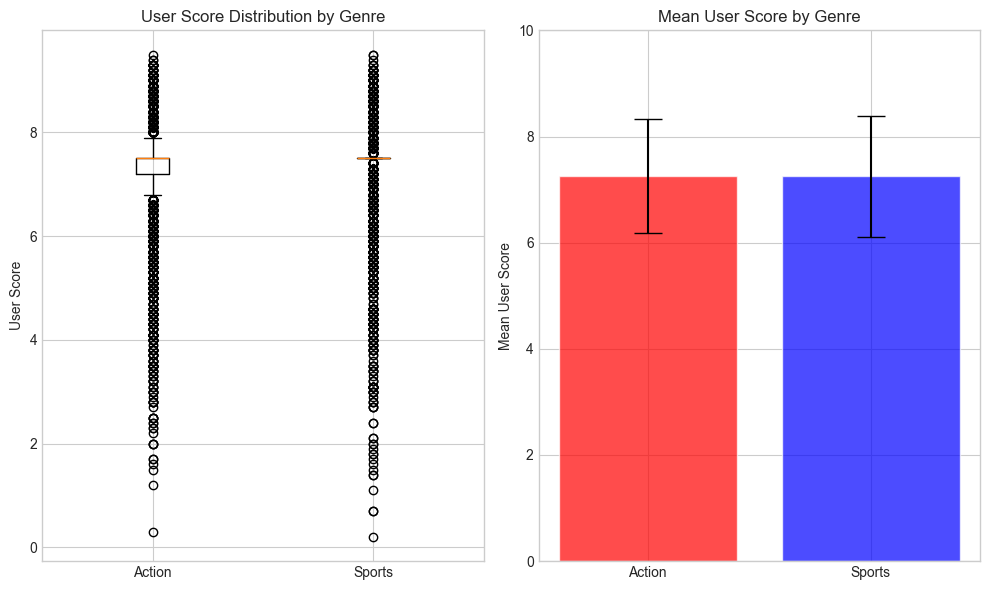

In [81]:
action_data = data_files_games[data_files_games['genre'] == 'Action']['user_score']
sports_data = data_files_games[data_files_games['genre'] == 'Sports']['user_score']

print(f"Action games sample size: {len(action_data)}")
print(f"Sports games sample size: {len(sports_data)}")

action_mean = action_data.mean()
sports_mean = sports_data.mean()
action_std = action_data.std()
sports_std = sports_data.std()

print(f"\nAction genre mean user score: {action_mean:.2f}, std dev: {action_std:.2f}")
print(f"Sports genre mean user score: {sports_mean:.2f}, std dev: {sports_std:.2f}")
print(f"Difference in means: {abs(action_mean - sports_mean):.2f}")

print("\nHypotheses:")
print("H₀: The average user ratings for Action and Sports genres are equal")
print("H₁: The average user ratings for Action and Sports genres are different")

t_stat, p_value = stats.ttest_ind(action_data, sports_data, equal_var=True)

print(f"\nTwo-tailed T-test results:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    conclusion = "Reject the null hypothesis. There is a significant difference in average user ratings between Action and Sports genres."
else:
    conclusion = "Fail to reject the null hypothesis. There is insufficient evidence of a difference in average user ratings between Action and Sports genres."

print(f"\nWith alpha = {alpha}")
print(conclusion)

plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')

plt.subplot(1, 2, 1)
box_data = [action_data, sports_data]
plt.boxplot(box_data, labels=['Action', 'Sports'])
plt.title('User Score Distribution by Genre')
plt.ylabel('User Score')

plt.subplot(1, 2, 2)
genres = ['Action', 'Sports']
means = [action_mean, sports_mean]
std_devs = [action_std, sports_std]

plt.bar(genres, means, yerr=std_devs, capsize=10, color=['red', 'blue'], alpha=0.7)
plt.title('Mean User Score by Genre')
plt.ylabel('Mean User Score')
plt.ylim(0, 10)  # Assuming scores are on a 0-10 scale

plt.tight_layout()
plt.show()